# Trabalho de extração

Grupo: Carlos Gomes (PG51681), Laís Carvalho (PG52536), Rita Nóbrega (PG46733).

O conjunto de dados selecionados para este trabalho foram retirados de um estudo cohort com 672 amostras recolhidas através de biopsias a 562 pacientes com Leucemia Mielóide Aguda (LMA)[^1]. Com o objetivo de correlacionar a sensibilidade e resistência de grupos de pacientes com LMA a tratamentos já existentes com a ocorrência de mutações, foram realizadas anotações clínicas detalhadas, estudos genómicos e transcriptómicos (com a sequenciação do exoma (622 amostras) e do RNA (451 amostras)), assim como testes *ex vivo* de sensibilidade a compostos. Os dados e estudo original podem ser consultados através do Genomic Data Commons (GDC).

Este trabalho tem como objetivo analisar os dados de expressão de pacientes com AML, comparando os seus dados transcriptómicos de acordo com o sexo, tipo de amostra e tratamentos cumulativos dados aos pacientes, com vista a obter informações sobre genes possivelmente expressos diferencialmente e/ou enriquecidos, que tenham um papel importante no tratamento da doença e na sobrevivência dos pacientes.

## Carregamento dos dados e pré-processamento

In [19]:
import pandas as pd

# Leitura de dados
RNA_cpm = pd.read_csv("data_mrna_seq_cpm.txt", index_col=0, header = 0, sep="\t")
meta_patient = pd.read_csv("data_clinical_patient.txt", sep="\t", skiprows=4, index_col=0)
meta_sample = pd.read_csv("data_clinical_sample.txt", sep="\t", skiprows=4, index_col=0)

In [20]:
RNA_cpm

,Entrez_Gene_Id,aml_ohsu_2018_12-00023,aml_ohsu_2018_12-00051,aml_ohsu_2018_12-00066,aml_ohsu_2018_12-00150,aml_ohsu_2018_12-00211,aml_ohsu_2018_12-00258,aml_ohsu_2018_12-00294,aml_ohsu_2018_12-00372,aml_ohsu_2018_12-00423,...,aml_ohsu_2018_16-01216,aml_ohsu_2018_16-01219,aml_ohsu_2018_16-01223,aml_ohsu_2018_16-01225,aml_ohsu_2018_16-01227,aml_ohsu_2018_16-01237,aml_ohsu_2018_16-01254,aml_ohsu_2018_16-01262,aml_ohsu_2018_16-01270,aml_ohsu_2018_16-01272
Hugo_Symbol,,,,,,,,,,,,,,,,,,,,,
TSPAN6,NaN,0.220678,1.659656,0.070215,1.709459,0.000000,0.000000,0.000000,0.921085,0.419787,...,0.648789,0.085224,1.024195,0.367642,0.395749,0.249059,0.069569,0.142059,0.150957,0.451810
DPM1,NaN,29.791548,29.363142,23.311415,32.137834,25.117470,29.351673,31.240770,22.940781,23.764632,...,34.238344,28.607021,30.376699,35.976402,25.101824,38.785308,25.717446,33.703438,16.575035,25.928877
SCYL3,NaN,19.336921,18.734961,10.532266,17.778376,37.659392,15.647852,39.189992,33.734750,17.724358,...,13.477109,20.823184,21.065833,23.765434,17.950065,7.245358,21.496909,16.461058,16.212740,8.734994
C1orf112,NaN,6.868607,2.617150,11.129094,11.253940,12.541923,8.190423,18.875313,11.110592,11.357582,...,5.721136,16.874449,6.494329,16.465113,6.105849,4.845333,10.551342,8.647826,6.944004,8.785195
FGR,NaN,801.392633,17.266804,906.792960,49.004499,111.834945,1004.458236,267.852800,170.631056,214.231512,...,583.113507,22.300408,55.469482,18.854786,24.508199,77.751751,1278.683475,45.565344,51.898882,563.758544
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
RP11-196O16.1,NaN,0.220678,0.159582,0.315968,1.082658,0.975109,0.350563,0.032713,1.151357,0.769610,...,0.206433,1.420408,2.700151,1.286747,0.339214,0.679252,0.440605,0.443934,2.113393,0.351408
RP4-671G15.2,NaN,0.027585,0.031916,0.105323,0.000000,0.067249,0.063739,0.228990,0.172703,0.116608,...,0.029490,0.170449,0.139663,0.393902,0.028268,0.045283,0.069569,0.124301,0.120765,0.100402
RP11-731C17.2,NaN,1.103391,0.255332,1.298979,0.626802,2.622708,0.956081,4.710650,3.943397,2.635332,...,3.951712,6.960000,2.932923,3.571380,4.324976,2.467950,1.182678,2.077609,2.324732,0.652615


In [21]:
print(RNA_cpm.info())

<class 'pandas.core.frame.DataFrame'>
Index: 22843 entries, TSPAN6 to RP11-114I8.4
Columns: 452 entries, Entrez_Gene_Id to aml_ohsu_2018_16-01272
dtypes: float64(452)
memory usage: 78.9+ MB
None


Verificámos assim que o dataset é um dataframe com uma dimensão de 22843 entradas nas linhas, correspondentes aos genes, e 452 colunas, correspondentes às amostras. Dado que a coluna 'Entrez_Gene_Id' aparenta estar vazia, a dimensão do dataset é a esperada, apresentando 22843 genes e 451 amostras.
De seguida, procedemos à eliminção da coluna com valores omissos e verificação de duplicados no nome dos genes. 

In [22]:
print('Dimensão original do dataframe:', RNA_cpm.shape)
# Verificar se há valores nulos
if RNA_cpm.isna().sum().sum() != 0:
    print('Há valores nulos no dataframe.')
# Retirar a coluna 'Entrez_Gene_Id'
RNA_cpm = RNA_cpm.drop(columns=['Entrez_Gene_Id'])
print('Dimensão do dataframe após remoção da coluna vazia:', RNA_cpm.shape)
if RNA_cpm.isna().sum().sum() == 0:
    print('Já não há valores nulos no dataframe.')

Dimensão original do dataframe: (22843, 452)
Há valores nulos no dataframe.
Dimensão do dataframe após remoção da coluna vazia: (22843, 451)
Já não há valores nulos no dataframe.


In [23]:
# Verificação de nome de genes duplicados
duplicated_genes = RNA_cpm[RNA_cpm.index.duplicated(keep= "first") ].index
if duplicated_genes.size == 0:
    print('Não há genes duplicados.')
else:
    print(f'Há {len(duplicated_genes)} genes duplicados:\n', duplicated_genes)

Há 6 genes duplicados:
 Index(['BTBD8', 'COMMD9', 'S1PR3', 'MYO18A', 'ENO1', 'MACF1'], dtype='object', name='Hugo_Symbol')


In [24]:
def renomear_duplicados(dados):
    index_list = dados.index.tolist()
    for gene_dup in duplicated_genes:
        for pos, gene in enumerate(dados.index):
            if gene == gene_dup:
                index_list[pos] = gene + "_duplicado"
                print(index_list[pos])
                break            
    dados.index = index_list
    if dados[dados.index.duplicated()].index.size == 0:
        return "Não há genes duplicados"
    else:
        return "Ainda há genes duplicados"

# Renomeando duplicados
renomear_duplicados(RNA_cpm)

BTBD8_duplicado
COMMD9_duplicado
S1PR3_duplicado
MYO18A_duplicado
ENO1_duplicado
MACF1_duplicado


'Não há genes duplicados'

In [25]:
if 'BTBD8' in RNA_cpm.index and 'BTBD8_duplicado' in RNA_cpm.index:
    print("BTBD8 estava duplicado, mas o duplicado foi renomeado com sucesso")

BTBD8 estava duplicado, mas o duplicado foi renomeado com sucesso


## Pré-processamento de metadados


In [26]:
print(meta_patient.info())

<class 'pandas.core.frame.DataFrame'>
Index: 562 entries, aml_ohsu_2018_17 to aml_ohsu_2018_4380
Data columns (total 21 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   SEX                                      562 non-null    object 
 1   ETHNICITY                                562 non-null    object 
 2   AGE_AT_DIAGNOSIS                         556 non-null    float64
 3   MDSMPN_DIAGNOSIS_AT_ACQUISITION          562 non-null    bool   
 4   NON_AML_MDSMPN_DIAGNOSIS_AT_ACQUISITION  562 non-null    bool   
 5   PRIOR_CANCER                             74 non-null     object 
 6   CHEMOTHERAPY                             562 non-null    object 
 7   PRIORRADIATIONFOROTHERCANCER             562 non-null    object 
 8   PRIOR_MDS                                562 non-null    object 
 9   MDS_TWO_MONTHS_PRIOR_AML                 562 non-null    object 
 10  PRIOR_MDSMPN             

In [27]:
print(meta_sample.info())

<class 'pandas.core.frame.DataFrame'>
Index: 672 entries, aml_ohsu_2018_163 to aml_ohsu_2018_2747
Data columns (total 74 columns):
 #   Column                                            Non-Null Count  Dtype  
---  ------                                            --------------  -----  
 0   SAMPLE_ID                                         672 non-null    object 
 1   SAMPLE_TIMEPOINT                                  442 non-null    object 
 2   FUSION                                            160 non-null    object 
 3   SPECIFIC_DIAGNOSIS_AT_INCLUSION                   672 non-null    object 
 4   ELN_2017                                          672 non-null    object 
 5   ELN_2008                                          658 non-null    object 
 6   SPECIFIC_DIAGNOSIS_AT_ACQUISITION                 672 non-null    object 
 7   GROUP                                             672 non-null    object 
 8   SAMPLE_SITE                                       672 non-null    object 


In [28]:
print(meta_sample.columns)

Index(['SAMPLE_ID', 'SAMPLE_TIMEPOINT', 'FUSION',
       'SPECIFIC_DIAGNOSIS_AT_INCLUSION', 'ELN_2017', 'ELN_2008',
       'SPECIFIC_DIAGNOSIS_AT_ACQUISITION', 'GROUP', 'SAMPLE_SITE', 'PLATFORM',
       'RNA_SEQUENCED', 'WHOLE_EXOME_SEQUENCING', 'EX_VIVO_DRUG_TESTING',
       'RNA_SEQ_ANALYSIS', 'EXOME_SEQ_ANALYSIS', 'DRUG_TESTING_IN_ANALYSIS',
       'CUMULATIVE_TREATMENT_TYPE_COUNT', 'CUMULATIVE_TREATMENT_TYPES',
       'CUMULATIVE_TREATMENT_REGIMEN_COUNT', 'CUMULATIVE_TREATMENT_REGIMENS',
       'CUMULATIVE_TREATMENT_STAGE_COUNT', 'CUMULATIVE_TREATMENT_STAGES',
       'INDUCTION_RESPONSE', 'TYPE_INDUCTION_TREATMENT',
       'DURATION_OF_INDUCTION_TREATMENT', 'MOST_RECENT_TREATMENT_TYPE',
       'CURRENT_REGIMEN', 'CURRENT_STAGE', 'MOST_RECENT_TREATMENT_DURATION',
       'KARYOTYPE_SAMPLE_ACQUISITION_INTERVAL_DIFFERENCE',
       'PB_BASOPHILS_PERCENTAGE', 'BM_BLAST_PERCENTAGE', 'PB_BLAST_PERCENTAGE',
       'CEBPA_BIALLELIC_MUTATION', 'PB_EOSINOPHILS_PERCENTAGE',
       'PB_IMMATURE_

Primeiramente, verificaram-se informações sobre os dataframes referentes a metadados de pacientes e de amostras carregados. 

Nos metadados dos pacientes estão descritas 21 variáveis correspondentes às 21 colunas do dataframe, sendo que nas linhas estão os 562 pacientes cada um representado através de um ID único. 

Nos metadados das amostras estão descritas 74 variáveis correspondentes às 74 colunas do dataframe, sendo que nas linhas estão as 672 amostras representadas pelo seu ID único. Esta quantidade de amostras superior à dos pacientes é esperada dado que alguns pacientes fornecerão mais do que uma amostra.

É possível notar que nem todas as amostras ou pacientes têm informação para todas as variáveis, existindo alguns valores omissos nos dois dataframes relativos aos metadados.

Para facilitar a análise posterior, um único dataframe foi criado com apenas os metadados referentes a pacientes ou amostras que estejam presentes nos dados de RNA-seq e só com as variáveis que serão usadas posterioremente.


In [29]:
samples_with_rna = meta_sample[meta_sample['RNA_SEQ_ANALYSIS'] == 'Yes']
print(samples_with_rna.info())

<class 'pandas.core.frame.DataFrame'>
Index: 451 entries, aml_ohsu_2018_550 to aml_ohsu_2018_4310
Data columns (total 74 columns):
 #   Column                                            Non-Null Count  Dtype  
---  ------                                            --------------  -----  
 0   SAMPLE_ID                                         451 non-null    object 
 1   SAMPLE_TIMEPOINT                                  317 non-null    object 
 2   FUSION                                            126 non-null    object 
 3   SPECIFIC_DIAGNOSIS_AT_INCLUSION                   451 non-null    object 
 4   ELN_2017                                          451 non-null    object 
 5   ELN_2008                                          445 non-null    object 
 6   SPECIFIC_DIAGNOSIS_AT_ACQUISITION                 451 non-null    object 
 7   GROUP                                             451 non-null    object 
 8   SAMPLE_SITE                                       451 non-null    object 


In [30]:
#Filtrar para ter apenas metadados de pacientes com amostras cujo RNA foi sequenciado
patients_with_rna = meta_patient[meta_patient.index.isin(samples_with_rna.index)]
print(patients_with_rna.info())

<class 'pandas.core.frame.DataFrame'>
Index: 411 entries, aml_ohsu_2018_29 to aml_ohsu_2018_4317
Data columns (total 21 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   SEX                                      411 non-null    object 
 1   ETHNICITY                                411 non-null    object 
 2   AGE_AT_DIAGNOSIS                         408 non-null    float64
 3   MDSMPN_DIAGNOSIS_AT_ACQUISITION          411 non-null    bool   
 4   NON_AML_MDSMPN_DIAGNOSIS_AT_ACQUISITION  411 non-null    bool   
 5   PRIOR_CANCER                             50 non-null     object 
 6   CHEMOTHERAPY                             411 non-null    object 
 7   PRIORRADIATIONFOROTHERCANCER             411 non-null    object 
 8   PRIOR_MDS                                411 non-null    object 
 9   MDS_TWO_MONTHS_PRIOR_AML                 411 non-null    object 
 10  PRIOR_MDSMPN             

In [40]:
# Merge dos metadados
metadados = pd.merge(samples_with_rna, patients_with_rna, on='PATIENT_ID', how='outer')

# Filtragem das variáveis de interesse
variaveis_interesse = ['SAMPLE_ID', 'SAMPLE_TIMEPOINT','ELN_2017', 'ELN_2008', 'OS_STATUS',
                        'GROUP', 'SAMPLE_SITE', 'SEX', 'ETHNICITY', 'PRIOR_CANCER',  'FUSION', 
                        'AGE_AT_DIAGNOSIS',  'AGE_AT_PROCUREMENT',  'DIAGNOSIS_AT_INCLUSION', 'DIAGNOSIS',
                        'CUMULATIVE_TREATMENT_TYPE_COUNT', 'CUMULATIVE_TREATMENT_TYPES', 
                        'CUMULATIVE_TREATMENT_REGIMEN_COUNT', 'CUMULATIVE_TREATMENT_REGIMENS', 
                        'CUMULATIVE_TREATMENT_STAGE_COUNT', 'CUMULATIVE_TREATMENT_STAGES', 
                        'INDUCTION_RESPONSE', 'TYPE_INDUCTION_TREATMENT', 'CANCER_TYPE_DETAILED',
                        'DURATION_OF_INDUCTION_TREATMENT', 'MOST_RECENT_TREATMENT_TYPE', 'CURRENT_REGIMEN', 
                        'CURRENT_STAGE', 'CYTOGENETICS_OTHER', 'SOMATIC_STATUS', 'ONCOTREE_CODE', 'CANCER_TYPE']
print('Nº de colunas do dataframe "metadados":', len(variaveis_interesse))
metadados = metadados[variaveis_interesse]

if metadados.shape == (451, 31):
    print('O dataframe "metadados" tem o número esperado de linhas e colunas, tendo 451 amostras e 31 variáveis (sendo uma das colunas é o ID de cada amostra).')

Nº de colunas do dataframe "metadados": 32


In [41]:
metadados

,SAMPLE_ID,SAMPLE_TIMEPOINT,ELN_2017,ELN_2008,OS_STATUS,GROUP,SAMPLE_SITE,SEX,ETHNICITY,PRIOR_CANCER,...,TYPE_INDUCTION_TREATMENT,CANCER_TYPE_DETAILED,DURATION_OF_INDUCTION_TREATMENT,MOST_RECENT_TREATMENT_TYPE,CURRENT_REGIMEN,CURRENT_STAGE,CYTOGENETICS_OTHER,SOMATIC_STATUS,ONCOTREE_CODE,CANCER_TYPE
PATIENT_ID,,,,,,,,,,,,,,,,,,,,,
aml_ohsu_2018_550,aml_ohsu_2018_12-00023,Denovo,Intermediate,Intermediate-I,1:DECEASED,Initial Acute Leukemia Diagnosis,Bone Marrow Aspirate,Female,White,NaN,...,Standard Chemotherapy,Acute Monoblastic/Monocytic Leukemia,7.0,Bone Marrow Transplant,"Bu/Flu/TBI (Busulfan, Fludarabine, Total Body ...",Allogeneic - Sibling,Normal,Matched,AMOL,Leukemia
aml_ohsu_2018_635,aml_ohsu_2018_12-00051,Denovo,Favorable or Intermediate,Intermediate-I,1:DECEASED,Initial Acute Leukemia Diagnosis,Bone Marrow Aspirate,Female,White,NaN,...,Standard Chemotherapy,AML with Mutated NPM1,7.0,Bone Marrow Transplant,"Fludarabine, Melphalan",Allogeneic - Matched Unrelated Donor,Normal,Matched,AMLNPM1,Leukemia
aml_ohsu_2018_559,aml_ohsu_2018_12-00066,After or at the time transformation from anoth...,Intermediate,Intermediate-I,1:DECEASED,Initial Acute Leukemia Diagnosis,Bone Marrow Aspirate,Male,White,NaN,...,Standard Chemotherapy,Chronic Myelomonocytic Leukemia,153.0,Standard Chemotherapy,"FLAG-IDA (Cytarabine, Filgrastim, Fludarabine,...",Salvage,Normal,Matched,CMML,Myelodysplastic/Myeloproliferative Neoplasms
aml_ohsu_2018_722,aml_ohsu_2018_12-00150,NaN,Intermediate,Not Enough Information,NaN,Unknown,Peripheral Blood,Male,AdmixedBlack,NaN,...,NaN,Acute Myeloid Leukemia,NaN,NONE,NONE,NONE,NaN,Matched,AML,Leukemia
aml_ohsu_2018_764,aml_ohsu_2018_12-00211,Denovo,Favorable,Intermediate-II,0:LIVING,Initial Acute Leukemia Diagnosis,Bone Marrow Aspirate,Female,White,NaN,...,Standard Chemotherapy,AML with Mutated NPM1,27.0,Bone Marrow Transplant,"Bu/Flu/TBI (Busulfan, Fludarabine, Total Body ...",Allogeneic - Sibling,While the chromosome 17 breakpoint is clearly ...,Matched,AMLNPM1,Leukemia
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
aml_ohsu_2018_4291,aml_ohsu_2018_16-01237,Denovo,Adverse,Adverse,0:LIVING,Initial Acute Leukemia Diagnosis,Bone Marrow Aspirate,Female,HispNative,NaN,...,NaN,AML with Myelodysplasia-Related Changes,NaN,Standard Chemotherapy,Decitabine,Supportive/Palliative Care,Loss of RARA gene at 17q21 is detected in 69% ...,Unmatched,AMLMRC,Leukemia
aml_ohsu_2018_4299,aml_ohsu_2018_16-01254,Denovo,Favorable,Favorable,0:LIVING,Initial Acute Leukemia Diagnosis,Bone Marrow Aspirate,Female,White,NaN,...,Standard Chemotherapy,AML with Mutated NPM1,6.0,Standard Chemotherapy,HiDAC,Consolidation,Normal,Matched,AMLNPM1,Leukemia
aml_ohsu_2018_4303,aml_ohsu_2018_16-01262,Denovo,Favorable,Intermediate-II,0:LIVING,Initial Acute Leukemia Diagnosis,Bone Marrow Aspirate,Female,White,NaN,...,Standard Chemotherapy,APL with PML-RARA,-1.0,Standard Chemotherapy,"ATRA, Arsenic Trioxide, Idarubicin",Induction,86/100 cells (86%) had the 1r/1g/2f dual fusio...,Matched,APLPMLRARA,Leukemia


## Sumarização dos metadados

In [42]:
print("Informações gerais do DataFrame:")
print(metadados.info())

print("\nDescrição estatística do DataFrame:")
print(metadados.describe(include='all'))

print("\nContagem de valores únicos em cada coluna:")
for column in metadados.columns:
    unique_values = metadados[column].nunique()
    print(f"{column}: {unique_values} valores únicos")

Informações gerais do DataFrame:
<class 'pandas.core.frame.DataFrame'>
Index: 451 entries, aml_ohsu_2018_550 to aml_ohsu_2018_4310
Data columns (total 32 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   SAMPLE_ID                           451 non-null    object 
 1   SAMPLE_TIMEPOINT                    317 non-null    object 
 2   ELN_2017                            451 non-null    object 
 3   ELN_2008                            445 non-null    object 
 4   OS_STATUS                           408 non-null    object 
 5   GROUP                               451 non-null    object 
 6   SAMPLE_SITE                         451 non-null    object 
 7   SEX                                 451 non-null    object 
 8   ETHNICITY                           451 non-null    object 
 9   PRIOR_CANCER                        57 non-null     object 
 10  FUSION                              126 non-null   

## Análise exploratória

In [43]:
import seaborn as sns
import matplotlib.pyplot as plt

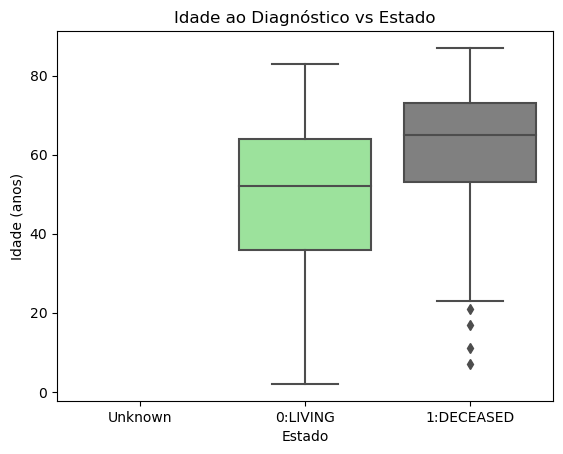

In [ ]:
## Análise do estado de sobrevivência dos pacientes
metadados['OS_STATUS'] = pd.Categorical(metadados['OS_STATUS'], categories=['Unknown', '0:LIVING', '1:DECEASED'])

# Criando o boxplot
sns.boxplot(x='OS_STATUS', y='AGE_AT_DIAGNOSIS', data=metadados, palette=['lightblue', 'lightgreen', 'grey'])

# Adicionando título e rótulos
plt.title('Idade ao Diagnóstico vs Estado')
plt.xlabel('Estado')
plt.ylabel('Idade (anos)')

# Ajustando os nomes das categorias do eixo x
plt.xticks(ticks=[0, 1, 2], labels=['Unknown', '0:LIVING', '1:DECEASED'])

# Exibindo o gráfico
plt.show()

É possível observar que a idade com que foram diagnosticados não parece ter uma influência ou associação significativa com a sobrevivência do paciente, embora a idade aquando do diagnóstico seja menor nos pacientes que ainda estão vivos, o que pode ter a ver com o facto da rapidez de diagnóstico estar normalmente associada a uma maior taxa de sobrevivência.

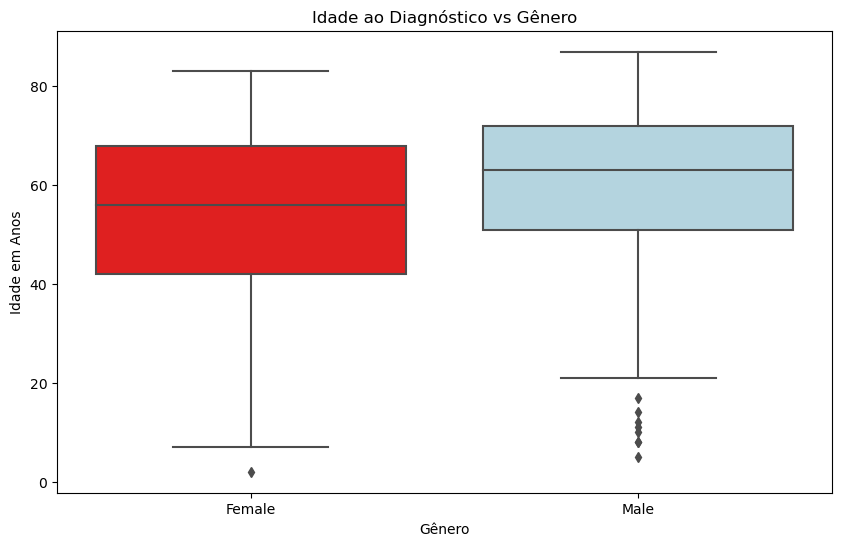

In [ ]:
## Análise das idades entre os diferentes sexos
colors = ['red', 'lightblue']

# Criando o boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(x='SEX', y='AGE_AT_DIAGNOSIS', data=metadados, palette=colors)

plt.title('Idade ao Diagnóstico vs Gênero')
plt.xlabel('Gênero')
plt.ylabel('Idade em Anos')
plt.show()

No boxplot é possível observar que a idade dos pacientes masculinos, é ligeiramente mais elevada, possuindo limites, quartis e mediana com idades superiores comparativamente aos pacientes femininos. Verifica-se também uma maior presença de outliers nos dados dos pacientes masculinos comparativamente aos femininos.

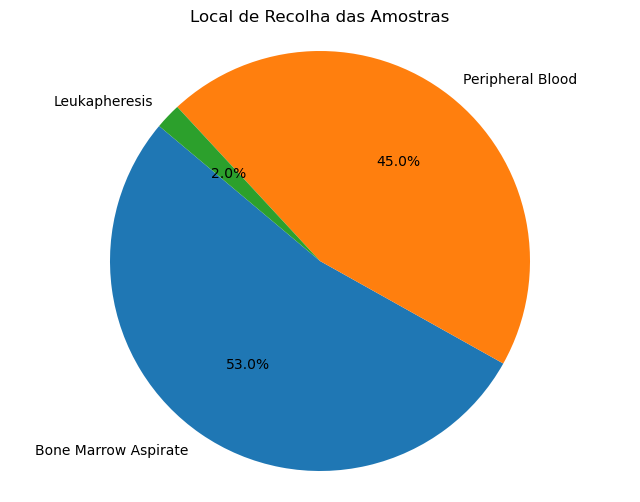

In [46]:
# Análise dos locias de recolha das amostras
counts = metadados['SAMPLE_SITE'].value_counts()

# Criando o gráfico de pizza
plt.figure(figsize=(8, 6))
plt.pie(counts, labels=counts.index, autopct='%1.1f%%', startangle=140)

plt.title('Local de Recolha das Amostras')

plt.axis('equal') 
plt.show()

Os locais de recolha de amostra mais frequentes entre os dados analisados são o "Aspirado de Medula Óssea" com pouco mais de 50% das amostras, o "Sangue Periférico" com uma distribuição pouco menor do que 50% das amostras, e a "Leucaferese" com opção menos utilizada. 

In [47]:
## verifiar qual o nome do grupo de diagnóstico mais frequente nos dados
x = pd.DataFrame(metadados['GROUP'].value_counts())
x.reset_index(inplace=True)

indice_maximo = x['count'].idxmax()

# Obtendo o nome do grupo com a frequência máxima
nome_maximo = x.loc[indice_maximo, 'GROUP']
print(nome_maximo)

Initial Acute Leukemia Diagnosis


## Análise univariada

##### Análise das idades para os diferentes sexos:

As variáveis analisadas foram: Idade e sexo dos pacientes, teve como objectivo de determinar se os dois grupos de sexo ("Male" e "Female") deferiam quanto as idades. Para fazer esta análise, foi avaliado se os dois diferentes grupos apresentam médias diferentes.

Teste de Shapiro-Wilk para normalidade (Masculino):
Estatística de Shapiro: nan
Valor p: nan

Teste de Shapiro-Wilk para normalidade (Feminino):
Estatística de Shapiro: 0.9619727523446049
Valor p: 4.5144881643667035e-05


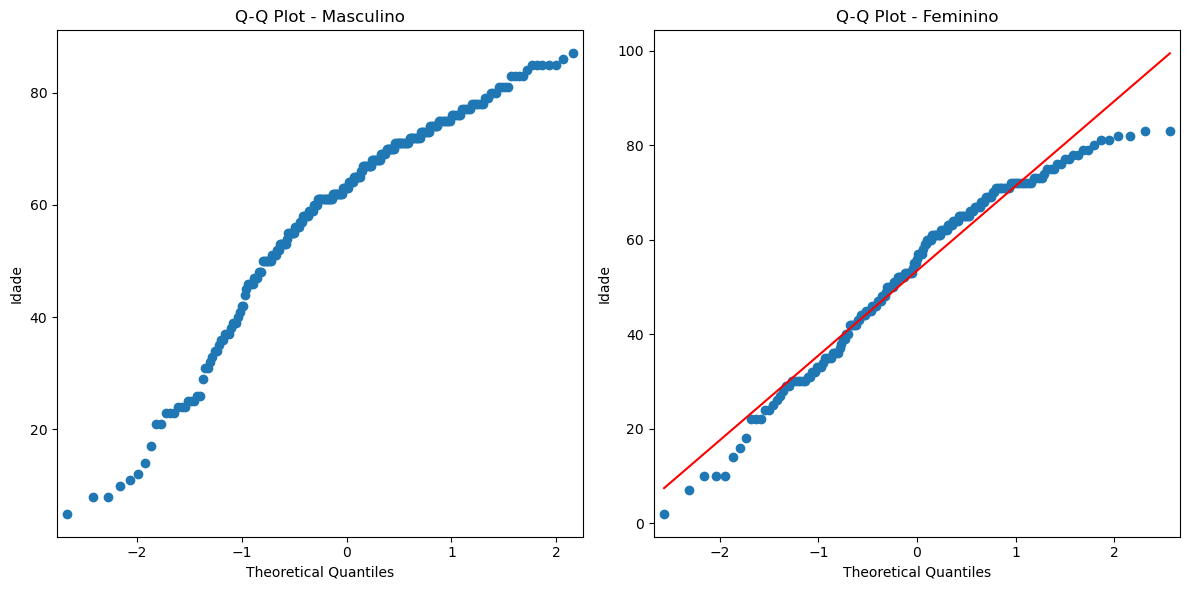

In [49]:
from scipy.stats import shapiro
import statsmodels.api as sm

## Análise da distribuição dos sexos
# Separando os grupos por sexo e calculando o teste de Shapiro-Wilk
teste_normalidade_masculino = shapiro(metadados.loc[metadados['SEX'] == 'Male', 'AGE_AT_DIAGNOSIS'])
teste_normalidade_feminino = shapiro(metadados.loc[metadados['SEX'] == 'Female', 'AGE_AT_DIAGNOSIS'])

print("Teste de Shapiro-Wilk para normalidade (Masculino):")
print("Estatística de Shapiro:", teste_normalidade_masculino.statistic)
print("Valor p:", teste_normalidade_masculino.pvalue)
print("\nTeste de Shapiro-Wilk para normalidade (Feminino):")
print("Estatística de Shapiro:", teste_normalidade_feminino.statistic)
print("Valor p:", teste_normalidade_feminino.pvalue)

# Visualização da normalidade com Q-Q plots
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))
sm.qqplot(metadados.loc[metadados['SEX'] == 'Male', 'AGE_AT_DIAGNOSIS'], line='s', ax=axes[0])
axes[0].set_title('Q-Q Plot - Masculino')
axes[0].set_ylabel('Idade')
sm.qqplot(metadados.loc[metadados['SEX'] == 'Female', 'AGE_AT_DIAGNOSIS'], line='s', ax=axes[1])
axes[1].set_title('Q-Q Plot - Feminino')
axes[1].set_ylabel('Idade')
plt.tight_layout()
plt.show()

Teste de Shapiro-Wilk para normalidade geral das idades:
Estatística de Shapiro: nan
Valor p: nan


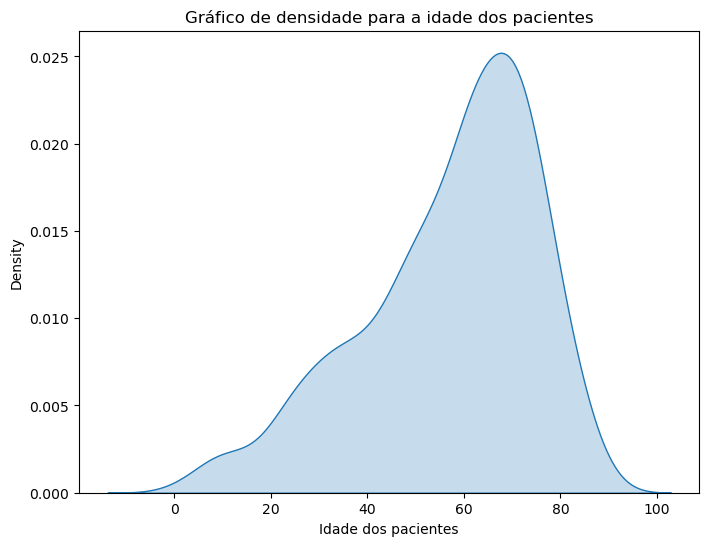

In [60]:
## Análise da normalidade das idades 
# Teste de Shapiro-Wilk para normalidade geral das idades
teste_normalidade_geral = shapiro(metadados['AGE_AT_DIAGNOSIS'])
print("Teste de Shapiro-Wilk para normalidade geral das idades:")
print("Estatística de Shapiro:", teste_normalidade_geral.statistic)
print("Valor p:", teste_normalidade_geral.pvalue)

# Removendo valores ausentes
idades_sem_na = metadados['AGE_AT_DIAGNOSIS'].dropna()

# Criar gráfico de densidade sem valores ausentes
plt.figure(figsize=(8, 6))
sns.kdeplot(idades_sem_na, fill=True)
plt.title("Gráfico de densidade para a idade dos pacientes")
plt.xlabel("Idade dos pacientes")
plt.show()

In [61]:
from scipy.stats import ttest_ind
# Separando as idades por sexo
idades_masculino = metadados.loc[metadados['SEX'] == 'Male', 'AGE_AT_DIAGNOSIS']
idades_feminino = metadados.loc[metadados['SEX'] == 'Female', 'AGE_AT_DIAGNOSIS']

# Realizando o teste t
t_statistic, p_value = ttest_ind(idades_masculino, idades_feminino, nan_policy='omit')

print("Teste t para comparar as médias das idades entre os sexos:")
print("Estatística t:", t_statistic)
print("Valor p:", p_value)

Teste t para comparar as médias das idades entre os sexos:
Estatística t: 3.6761572091209875
Valor p: 0.0002656111695279592


Com base na análise final, é possível concluir que as idades diferem para os grupos "Male" e "Female". Implicando que em análises de expressão com estes diferentes grupos, parte das variações e diferenças podem ser reflexo das diferentes idades.

##### Análise para variáveis "AGE_AT_PROCUREMENT", "ELN_2017" e "ELN_2008":

- "AGE_AT_PROCUREMENT" - Idade dos pacientes na aquisição das amostras.

- "ELN_2017" - variável usada para classificar pacientes com leucemia mieloide aguda (LMA) em diferentes grupo de risco, classificação definida em 2017.

- "ELN_2008" - classificação dos pacientes em diferentes grupos definida em 2008. 

Esta análise tem como objectivo avaliar se a idade tem associação com diferentes grupos de risco.

**"AGE_AT_PROCUREMENT" e "ELN_2017"**

In [62]:
# Identificação das categorias e suas distribuições
eln_counts = metadados['ELN_2017'].value_counts()
print(eln_counts)

ELN_2017
Adverse                      162
Intermediate                 150
Favorable                    117
Favorable or Intermediate     14
Intermediate or Adverse        7
Unknown                        1
Name: count, dtype: int64


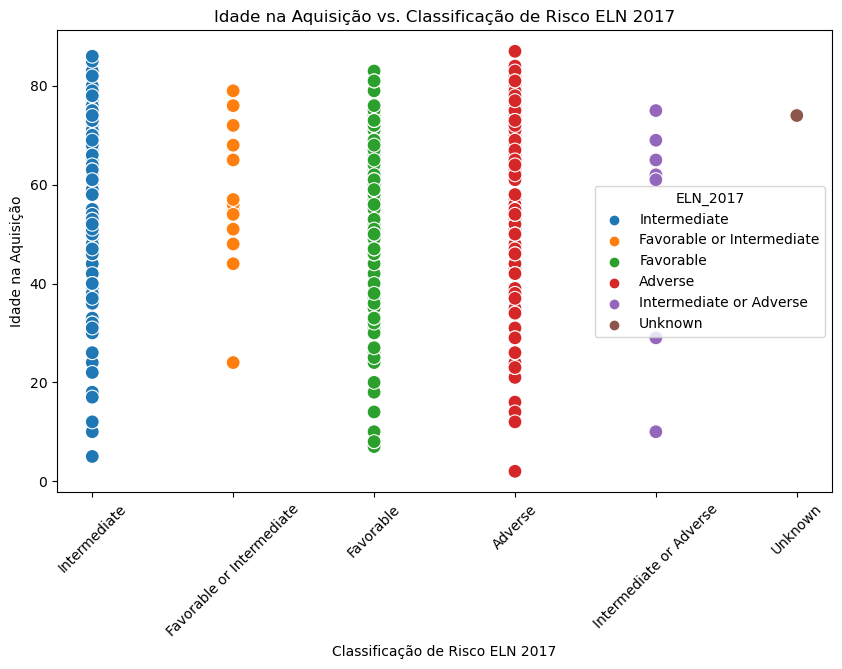

In [ ]:
# Formulação do gráfico de dispersão
plt.figure(figsize=(10, 6))
sns.scatterplot(data=metadados, x='ELN_2017', y='AGE_AT_PROCUREMENT', hue='ELN_2017', s=100)

plt.xlabel("Classificação de Risco ELN 2017")
plt.ylabel("Idade na Aquisição")
plt.title("Idade na Aquisição vs. Classificação de Risco ELN 2017")
plt.xticks(rotation=45)

plt.show()

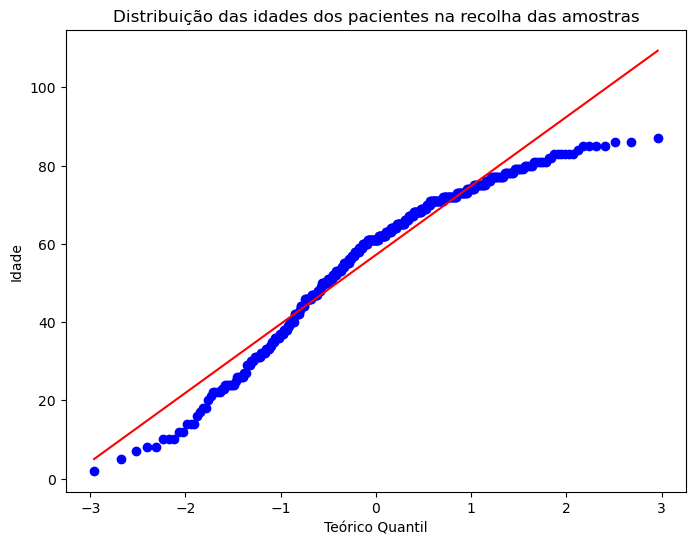

Shapiro-Wilk Test: W=0.941939380219604, p-value=2.9214737902222302e-12


In [64]:
## Análise da normalidade
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats

plt.figure(figsize=(8, 6))
stats.probplot(metadados['AGE_AT_PROCUREMENT'].dropna(), dist="norm", plot=plt)
plt.xlabel('Teórico Quantil')
plt.ylabel('Idade')
plt.title('Distribuição das idades dos pacientes na recolha das amostras')
plt.show()

shapiro_test = stats.shapiro(metadados['AGE_AT_PROCUREMENT'].dropna())
print(f"Shapiro-Wilk Test: W={shapiro_test.statistic}, p-value={shapiro_test.pvalue}")

In [65]:
## Análise das variâncias
from scipy.stats import levene
groups = [group['AGE_AT_PROCUREMENT'].dropna().values for name, group in metadados.groupby('ELN_2017')]
levene_test = levene(*groups)
print(f"Levene Test: Statistic={levene_test.statistic}, p-value={levene_test.pvalue}") # não há evidências estatisticamente significativas de que as variâncias entre os grupos sejam diferentes

Levene Test: Statistic=0.6718198144904891, p-value=0.6450140073429849


In [66]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

# ANOVA
anova_model = ols('AGE_AT_PROCUREMENT ~ C(ELN_2017)', data=metadados).fit()
anova_table = sm.stats.anova_lm(anova_model, typ=2)
print(anova_table)

                    sum_sq     df         F   PR(>F)
C(ELN_2017)    5006.889498    5.0  3.140248  0.00849
Residual     141584.941613  444.0       NaN      NaN


In [67]:
import statsmodels.stats.multicomp as mc

## Análise por grupo
metadados_clean = metadados.dropna(subset=['AGE_AT_PROCUREMENT', 'ELN_2017'])
# Tukey HSD
tukey = mc.MultiComparison(metadados_clean['AGE_AT_PROCUREMENT'], metadados_clean['ELN_2017'])
tukey_result = tukey.tukeyhsd()
print(tukey_result.summary())

                    Multiple Comparison of Means - Tukey HSD, FWER=0.05                    
          group1                    group2          meandiff p-adj   lower    upper  reject
-------------------------------------------------------------------------------------------
                  Adverse                 Favorable  -7.9003  0.004 -14.1014 -1.6992   True
                  Adverse Favorable or Intermediate   -1.672 0.9994 -15.9101 12.5662  False
                  Adverse              Intermediate  -1.4188 0.9819  -7.2204  4.3828  False
                  Adverse   Intermediate or Adverse  -6.8148 0.9215 -26.5461 12.9165  False
                  Adverse                   Unknown  14.1852 0.9688 -37.0838 65.4542  False
                Favorable Favorable or Intermediate   6.2283 0.8203   -8.226 20.6826  False
                Favorable              Intermediate   6.4814 0.0403   0.1679  12.795   True
                Favorable   Intermediate or Adverse   1.0855    1.0 -18.8024 20.

A variável `AGE_AT_PROCUREMENT` não segue a distribuição normal, mas devido o elevado tamanho da amostra a análise ANOVA e Tukey HSD foram determinadas, permitindo concluir que a idade dos pacientes são fatores relevantes na determinação dos pacientes nos grupos de risco: `"Favoravel" e "Adverse"` e `"Favorable" e "Intermediate"`. 

**"AGE_AT_PROCUREMENT" e "ELN_2008"**

In [68]:
# Identificação das categorias e suas distribuições
eln_counts = metadados['ELN_2008'].value_counts()
print(eln_counts)

ELN_2008
Not Enough Information    126
Adverse                    96
Intermediate-II            86
Favorable                  79
Intermediate-I             58
Name: count, dtype: int64


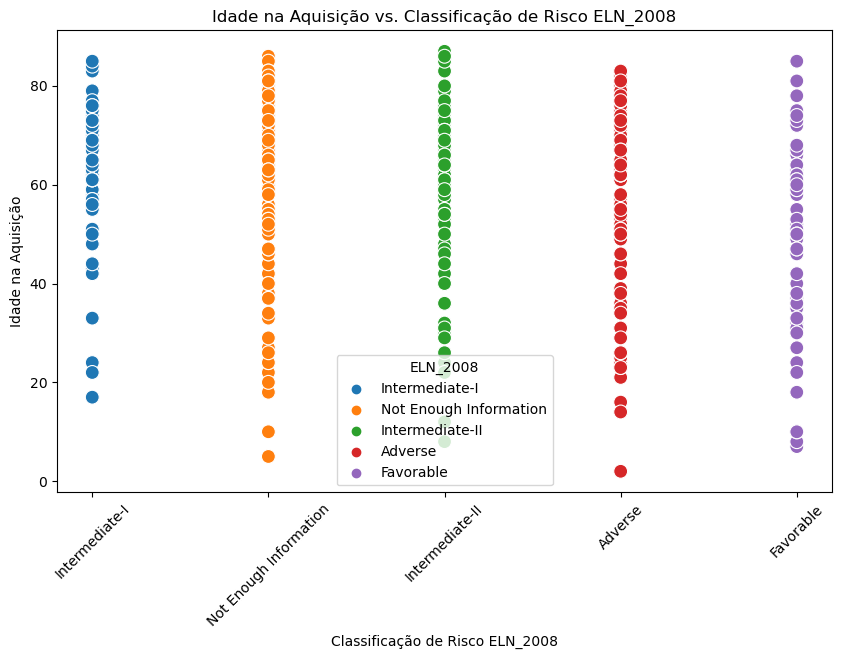

In [ ]:
# Formulação do gráfico de dispersão
plt.figure(figsize=(10, 6))
sns.scatterplot(data=metadados, x='ELN_2008', y='AGE_AT_PROCUREMENT', hue='ELN_2008', s=100)

plt.xlabel("Classificação de Risco ELN_2008")
plt.ylabel("Idade na Aquisição")
plt.title("Idade na Aquisição vs. Classificação de Risco ELN_2008")
plt.xticks(rotation=45)

plt.show()

In [69]:
## Análise das variâncias
groups = [group['AGE_AT_PROCUREMENT'].dropna().values for name, group in metadados.groupby('ELN_2008')]
levene_test = levene(*groups)
print(f"Levene Test: Statistic={levene_test.statistic}, p-value={levene_test.pvalue}")

# ANOVA
anova_model = ols('AGE_AT_PROCUREMENT ~ C(ELN_2008)', data=metadados).fit()
anova_table = sm.stats.anova_lm(anova_model, typ=2)
print(anova_table)

## Análise por grupo
metadados_clean = metadados.dropna(subset=['AGE_AT_PROCUREMENT', 'ELN_2008'])
# Tukey HSD
tukey = mc.MultiComparison(metadados_clean['AGE_AT_PROCUREMENT'], metadados_clean['ELN_2008'])
tukey_result = tukey.tukeyhsd()
print(tukey_result.summary())

Levene Test: Statistic=2.0317165807986277, p-value=0.08901248772659949
                    sum_sq     df         F    PR(>F)
C(ELN_2008)    3978.405845    4.0  3.085905  0.015916
Residual     141814.043593  440.0       NaN       NaN
             Multiple Comparison of Means - Tukey HSD, FWER=0.05              
     group1             group2         meandiff p-adj   lower    upper  reject
------------------------------------------------------------------------------
        Adverse              Favorable  -4.3559 0.4999 -11.8258   3.114  False
        Adverse         Intermediate-I     4.81 0.4911  -3.3682 12.9881  False
        Adverse        Intermediate-II   1.0875 0.9942  -6.2138  8.3887  False
        Adverse Not Enough Information   3.4797 0.6081  -3.1823 10.1416  False
      Favorable         Intermediate-I   9.1659 0.0273   0.6628  17.669   True
      Favorable        Intermediate-II   5.4433 0.2949  -2.2201 13.1068  False
      Favorable Not Enough Information   7.8355  0.021  

Diferentemente das classificações de 2017, os dois grupo que apresentaram maior interferência das idades pela classificação de 2008 foram `"Favorable" e "Intermediate-I"`. 

## Análise de expressão diferencial

O primero passo da análise de expressão diferencial foi ver que genes possuiam uma média de expressão mais elevada.

In [88]:
rna_data = RNA_cpm.copy()
rna_data['Mean_expression'] = rna_data.iloc[:,1:].mean(axis=1)
sorted_data = rna_data.sort_values(by='Mean_expression', ascending=False)

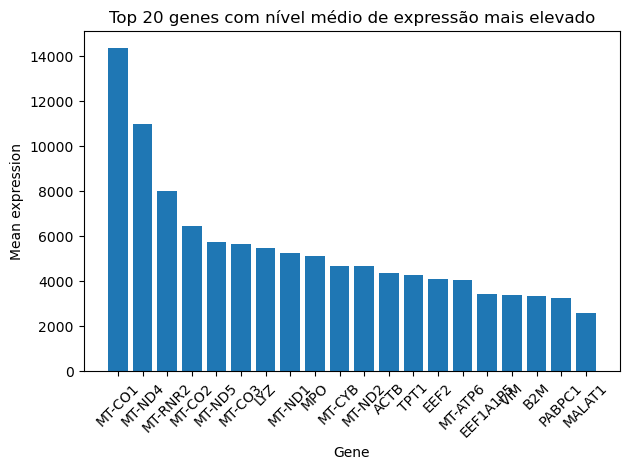

In [89]:
top_n = 20
plt.bar(sorted_data.index[:top_n], sorted_data['Mean_expression'][:top_n])
plt.xlabel('Gene')
plt.ylabel('Mean expression')
plt.title(f'Top {top_n} genes com nível médio de expressão mais elevado')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

A análise dos 20 genes com nível médio de expressão mais elevado revelam que metade destes são genes mitocondriais como o MT-CO1, MT-ND4, MT-RNR2 e MT-CO2.

Para cada variável analisada (sexo e ELN 2017), a identificação de genes diferencialmente expressos foi feita através de dois métodos:
* Com a função `genes_mais_exp()` que combina a análise de dispersão (IQR) para filtrar a variabilidade e o teste ANOVA com seleção de percentis. Esta função irá permitir perceber os valores que se encontram mais diferencialmente expressos através da distinção entre os genes que têm um valor p menor que 0.05 e 0.01.
* Com a função `expressao_diferencial()` que usa o teste t e a ANOVA para avaliar se há diferenças significativas na expressão génica entre os grupos de cada variável, devolvendo o valor da estatistica, o valor p ajustado e log5 fold change. Esta função irá permitir distinguir entre genes upregulated e downregulated.

A comparação de ambas as análises irá permitir identificar os genes com uma maior expressão diferencial e ainda se estes estão downregulated ou upregulated.

In [90]:
import scanpy as sc 
import numpy as np
from scipy import stats
import statsmodels.api as sm
from statsmodels.stats.multitest import multipletests
from sklearn.feature_selection import SelectPercentile, f_classif


In [149]:
def genes_mais_exp(dados, metadados, condicao, p_value_threshold=0.05, percentile=10):
    dados_alinhados = dados.loc[:, metadados.index]
    metadados_alinhados = metadados.loc[dados.columns]

    # Cálculo do IQR e filtragem de colunas
    Q1 = dados_alinhados.quantile(0.25, axis=1)
    Q3 = dados_alinhados.quantile(0.75, axis=1)
    iqr = Q3 - Q1
    cutoff = iqr.quantile(0.2)
    filtered_columns = iqr[iqr > cutoff].index
    filtered_data = dados_alinhados.loc[filtered_columns]

    # Seleção de percentil usando ANOVA f_classif
    selector = SelectPercentile(f_classif, percentile=percentile)
    X_new = selector.fit_transform(filtered_data.T, metadados_alinhados[condicao])  # Transposição dos dados para amostras x genes

    # Genes com p-valores abaixo dos thresholds especificados
    gde = np.where(selector.pvalues_ < 0.001)[0]
    gde2 = np.where(selector.pvalues_ < p_value_threshold)[0]

    genes_001 = filtered_data.index[gde]
    genes_005 = filtered_data.index[gde2]

    return genes_001, genes_005, selector.pvalues_


### Sexo

In [77]:
# 1ª variável de interesse: 'SEX'
sexo = metadados[['SEX', 'SAMPLE_ID']]
sexo = sexo.set_index('SAMPLE_ID')
sexo.head()

,SEX
SAMPLE_ID,
aml_ohsu_2018_12-00023,Female
aml_ohsu_2018_12-00051,Female
aml_ohsu_2018_12-00066,Male
aml_ohsu_2018_12-00150,Male
aml_ohsu_2018_12-00211,Female


In [150]:
genes_001_sex, genes_005_sex, pvalues = genes_mais_exp(RNA_cpm, sexo, 'SEX')
print('Número de genes com p-valor < 0.001:', len(genes_001_sex))
print(genes_001_sex)

print('Número de genes com p-valor < 0.05:', len(genes_005_sex))
print(genes_005_sex)

Número de genes com p-valor < 0.001: 15
Index(['UBIAD1', 'FAM78A', 'NRL', 'GTPBP3', 'RITA1', 'WDR89', 'SURF6', 'TAF5',
       'LETM2', 'ZNHIT2', 'GNG7', 'PPARA', 'ZNF790', 'HNRNPUL2', 'FDXACB1'],
      dtype='object')
Número de genes com p-valor < 0.05: 1747
Index(['NFYA', 'NIPAL3', 'ANKIB1', 'KRIT1', 'RAD52', 'MAD1L1', 'KLHL13',
       'WDR54', 'PDK2', 'SYNRG',
       ...
       'RP11-894J14.5', 'RP11-53O19.3', 'RP11-722E23.2', 'RP11-101E13.5',
       'RP11-251G23.5', 'RP11-339B21.15', 'RP4-813F11.4', 'RP11-513M16.8',
       'RP11-339B21.14', 'RP11-61L19.3'],
      dtype='object', length=1747)


In [94]:
# Função para realizar análise de expressão diferencial
def expressao_diferencial_sexo(dados, metadados, condicao):
    # Normalização com a transformação logaritmica
    log_counts = np.log1p(dados)
    results = pd.DataFrame(index=dados.index)

    # Realizar o teste t para cada gene
    for gene in dados.index:
        grupo_male = log_counts.loc[gene, metadados[condicao] == 'Female']
        grupo_female = log_counts.loc[gene, metadados[condicao] == 'Male']
        
        t_stat, p_val = stats.ttest_ind(grupo_female, grupo_male, nan_policy='omit')
        results.loc[gene, 't_stat'] = t_stat
        results.loc[gene, 'p_val'] = p_val

        # Calcular o log2 fold change
        mean_female = np.mean(grupo_female)
        mean_male = np.mean(grupo_male)
        fold_change = mean_female / mean_male if mean_male != 0 else np.inf
        log2foldchange = np.log2(fold_change)
        results.loc[gene, 'log2foldchange'] = log2foldchange
    
    # Ajustar os p-values
    results['p_adj'] = multipletests(results['p_val'], method='fdr_bh')[1]
    
    return results

In [95]:
#Expressão diferencial entre sexos
resultados_sexo = expressao_diferencial_sexo(RNA_cpm, sexo, 'SEX')
print(resultados_sexo)

                 t_stat     p_val  log2foldchange     p_adj
TSPAN6         1.289343  0.197943        0.243929  0.634596
DPM1          -0.562042  0.574368       -0.005363  0.881062
SCYL3         -0.572047  0.567576       -0.012229  0.877505
C1orf112       1.969536  0.049506        0.058775  0.372362
FGR            0.071838  0.942763        0.002316  0.989506
...                 ...       ...             ...       ...
RP11-196O16.1  0.307880  0.758316        0.032255  0.944026
RP4-671G15.2   0.576910  0.564289        0.068399  0.876180
RP11-731C17.2  1.290322  0.197603        0.071148  0.634591
RP4-621B10.8  -1.235797  0.217180       -0.173736  0.652060
RP11-114I8.4  -0.338103  0.735443       -0.025619  0.937856

[22843 rows x 4 columns]


In [ ]:
print('Total de genes diferencialmente expressos entre sexos:', len(resultados_sexo[resultados_sexo['p_adj'] < 0.05]))

down_genes = resultados_sexo[resultados_sexo['p_adj'] < 0.05][resultados_sexo['log2foldchange'] < 0]
up_genes = resultados_sexo[resultados_sexo['p_adj'] < 0.05][resultados_sexo['log2foldchange'] > 0]
not_dif_genes = resultados_sexo[resultados_sexo['p_adj'] >= 0.05]

# Imprimir o resumo dos resultados
print("\nGenes downregulated:", len(down_genes))
print("Top 10 de Genes downregulated:", down_genes.nlargest(5, 'log2foldchange').index.tolist())
print("\nGenes que não estão diferencialmente expressos:", len(not_dif_genes))
print("\nGenes Upregulated:", len(up_genes))
print("Top 10 de Genes upregulated:", up_genes.nlargest(5, 'log2foldchange').index.tolist())

Total de genes diferencialmente expressos entre sexos: 358

Genes downregulated: 120
Top 10 de Genes downregulated: ['SDF4', 'RTN4', 'TAGLN2', 'EIF2S3', 'DENND4A']

Genes que não estão diferencialmente expressos: 22485

Genes Upregulated: 238
Top 10 de Genes upregulated: ['AC010084.1', 'RP11-576C2.1', 'NLGN4Y', 'ZFY-AS1', 'RPS4Y2']


C:\Users\35191\AppData\Local\Temp\ipykernel_5932\3477842648.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  down_genes = resultados_sexo[resultados_sexo['p_adj'] < 0.05][resultados_sexo['log2foldchange'] < 0]
C:\Users\35191\AppData\Local\Temp\ipykernel_5932\3477842648.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  up_genes = resultados_sexo[resultados_sexo['p_adj'] < 0.05][resultados_sexo['log2foldchange'] > 0]


c:\Users\35191\anaconda3\envs\Workshop\Lib\site-packages\pandas\core\arraylike.py:396: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


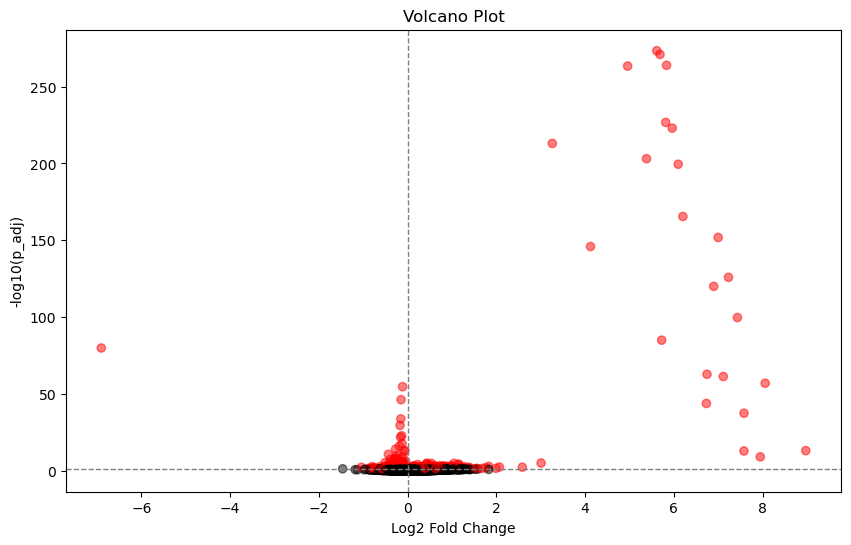

In [117]:
colors = np.where(resultados_sexo['p_adj'] < 0.05, 'r', 'black')

# Plot do Volcano Plot
plt.figure(figsize=(10, 6))
plt.scatter(resultados_sexo['log2foldchange'], -np.log10(resultados_sexo['p_adj']), color=colors, alpha=0.5)
plt.xlabel('Log2 Fold Change')
plt.ylabel('-log10(p_adj)')
plt.title('Volcano Plot')
plt.axhline(y=-np.log10(0.05), color='gray', linestyle='--', linewidth=1)
plt.axvline(x=0, color='gray', linestyle='--', linewidth=1)
plt.show()

In [156]:
print('Genes downregulated identificados em ambos os métodos:', len(list(set(gene for gene in down_genes.index if gene in genes_005_sex))), '\n', list(set(gene for gene in down_genes.index if gene in genes_005_sex)))
print('Genes upregulated identificados em ambos os métodos:', len(list(set(gene for gene in up_genes.index if gene in genes_005_sex))), '\n', list(set(gene for gene in up_genes.index if gene in genes_005_sex)))

Genes downregulated identificados em ambos os métodos: 4 
 ['TPPP3', 'TMEM150A', 'VIM', 'XIST']
Genes upregulated identificados em ambos os métodos: 16 
 ['USP9Y', 'HPGD', 'KDM5D', 'UTY', 'CACNA1C-AS2', 'IKZF2', 'SDK2', 'KALP', 'CTD-3064H18.1', 'TXLNG2P', 'C12orf23', 'MAF', 'RP11-576C2.1', 'RP11-424G14.1', 'TTTY14', 'RNF26']


Ambas as análises revelaram genes diferencialmente expressos entre os sexos, sendo que há 20 genes em comum nos seus resultados: 4 downregulated e 16 upregulated.
Como esperado, nesta lista destacam-se genes relacionados com o sexo como o 'XIST', envolvido na inativação do cromossoma X, e 'USP9Y', um gene do cromossoma Y. Adicionalmente, também estão presentes genes relacionados com a progressão tumoral como, por exemplo, 'HPGD', 'VIM' e 'TPPP3'.

### ELN_2017

In [118]:
# 2ª variável de interesse: 'ELN_2017'
eln17 = metadados[['ELN_2017', 'SAMPLE_ID']]
eln17 = eln17.set_index('SAMPLE_ID')
eln17.head()

,ELN_2017
SAMPLE_ID,
aml_ohsu_2018_12-00023,Intermediate
aml_ohsu_2018_12-00051,Favorable or Intermediate
aml_ohsu_2018_12-00066,Intermediate
aml_ohsu_2018_12-00150,Intermediate
aml_ohsu_2018_12-00211,Favorable


In [158]:
genes_001_eln17, genes_005_eln17, pvalues_eln17 = genes_mais_exp(RNA_cpm, eln17, 'ELN_2017')
print('Número de genes com p-valor < 0.001:', len(genes_001_eln17))
print(genes_001_eln17)

print('Número de genes com p-valor < 0.05:', len(genes_005_eln17))
print(genes_005_eln17)

Número de genes com p-valor < 0.001: 235
Index(['MLXIPL', 'CP', 'HHAT', 'WDR18', 'PPAP2A', 'MBD3', 'NDE1', 'SEMA3A',
       'GPC4', 'CASS4',
       ...
       'RP11-678G14.2', 'RP11-475J5.6', 'CTA-221G9.10', 'CTD-2006H14.2',
       'GTF2H5', 'RP1-20C7.6', 'RP11-504P24.8', 'RP13-131K19.7',
       'RP11-644N4.1', 'RP11-548H3.1'],
      dtype='object', length=235)
Número de genes com p-valor < 0.05: 1531
Index(['CD99', 'KLHL13', 'CFLAR', 'RBM6', 'DHX33', 'CREBBP', 'ZNF195', 'ZFX',
       'GGNBP2', 'GGCT',
       ...
       'RP11-440D17.3', 'RP11-339B21.15', 'RP11-118K6.3', 'RP11-170N16.3',
       'RP11-67L2.2', 'RP11-458F8.4', 'RP11-5C23.2', 'RP13-131K19.7',
       'RP11-644N4.1', 'RP11-548H3.1'],
      dtype='object', length=1531)


In [ ]:
def expressao_diferencial_eln(dados, metadados, condicao):
    # Normalização com a transformação logarítmica
    log_counts = np.log1p(dados)
    results = pd.DataFrame(index=dados.index)

    # Realizar o teste ANOVA para cada gene
    for gene in dados.index:
        categorias = metadados[condicao].unique()
        grupos = [log_counts.loc[gene, metadados[condicao] == categoria] for categoria in categorias]

        # Verificar se todos os grupos têm amostras
        if any(len(grupo) == 0 for grupo in grupos):
            continue

        f_stat, p_val = stats.f_oneway(*grupos)
        results.loc[gene, 'f_stat'] = f_stat
        results.loc[gene, 'p_val'] = p_val

        # Calcular o log2 fold change para cada categoria em relação à média geral
        mean_overall = np.mean(log_counts.loc[gene, :])
        log2foldchanges = {}
        for categoria, grupo in zip(categorias, grupos):
            mean_categoria = np.mean(grupo)
            fold_change = mean_categoria / mean_overall if mean_overall != 0 else np.inf
            if fold_change > 0:
                log2foldchange = np.log2(fold_change)
            else:
                log2foldchange = -np.inf 
            log2foldchanges[f'log2foldchange_{categoria}'] = log2foldchange
        
        results = results.assign(**log2foldchanges)

    # Ajustar os p-values
    results['p_adj'] = multipletests(results['p_val'], method='fdr_bh')[1]

    return results

resultados_eln17 = expressao_diferencial_eln(RNA_cpm, eln17, 'ELN_2017')
print(resultados_eln17.head())

                 f_stat     p_val  log2foldchange_Intermediate  \
TSPAN6         3.101673  0.009172                     0.045458   
DPM1           0.958903  0.442690                     0.045458   
SCYL3          1.317262  0.255471                     0.045458   
C1orf112       0.755785  0.582150                     0.045458   
FGR            2.312412  0.043107                     0.045458   
...                 ...       ...                          ...   
RP11-196O16.1  2.919358  0.013201                     0.045458   
RP4-671G15.2   0.728593  0.602267                     0.045458   
RP11-731C17.2  0.665476  0.649840                     0.045458   
RP4-621B10.8   2.531880  0.028265                     0.045458   
RP11-114I8.4   2.232985  0.050122                     0.045458   

               log2foldchange_Favorable or Intermediate  \
TSPAN6                                         0.402329   
DPM1                                           0.402329   
SCYL3                         

In [143]:
genes_significativos_2017 = resultados_eln17[resultados_eln17['p_adj'] < 0.05]
print('Total de genes diferencialmente expressos entre classificações ELN 2017:', len(genes_significativos_2017))

not_dif_genes_17 = resultados_eln17[resultados_eln17['p_adj'] >= 0.05]
print("\nGenes que não estão diferencialmente expressos:", len(not_dif_genes_17))


up_genes_17 = {}
down_genes_17 = {}
for coluna in resultados_eln17.columns:
    if coluna.startswith('log2foldchange'):
        genes_up = genes_significativos_2017[genes_significativos_2017[coluna] > 0].index
        up_genes_17[coluna] = len(genes_up)
        genes_down = genes_significativos_2017[genes_significativos_2017[coluna] < 0].index
        down_genes_17[coluna] = len(genes_down)


# Imprimir o resumo dos resultados
print("\nGenes downregulated:", down_genes_17)
print("\nGenes Upregulated:", up_genes_17)


Total de genes diferencialmente expressos entre classificações ELN 2017: 6755

Genes que não estão diferencialmente expressos: 16088

Genes downregulated: {'log2foldchange_Intermediate': 0, 'log2foldchange_Favorable or Intermediate': 0, 'log2foldchange_Favorable': 0, 'log2foldchange_Adverse': 6755, 'log2foldchange_Intermediate or Adverse': 0, 'log2foldchange_Unknown': 0}

Genes Upregulated: {'log2foldchange_Intermediate': 6755, 'log2foldchange_Favorable or Intermediate': 6755, 'log2foldchange_Favorable': 6755, 'log2foldchange_Adverse': 0, 'log2foldchange_Intermediate or Adverse': 6755, 'log2foldchange_Unknown': 6755}


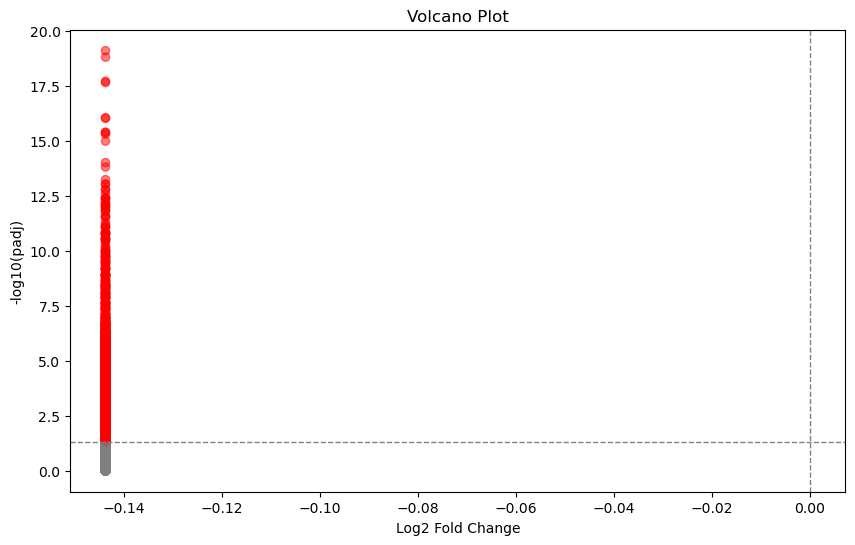

In [144]:
colors = np.where(resultados_eln17['p_adj'] < 0.05, 'r', 'gray')

# Plot do Volcano Plot
plt.figure(figsize=(10, 6))
plt.scatter(resultados_eln17['log2foldchange_Adverse'], -np.log10(resultados_eln17['p_adj']), color=colors, alpha=0.5)
plt.xlabel('Log2 Fold Change')
plt.ylabel('-log10(padj)')
plt.title('Volcano Plot')
plt.axhline(y=-np.log10(0.05), color='gray', linestyle='--', linewidth=1)
plt.axvline(x=0, color='gray', linestyle='--', linewidth=1)
plt.show()

In [179]:
down_reg_adverse = resultados_eln17[resultados_eln17['p_adj'] < 0.05][resultados_eln17['log2foldchange_Adverse'] < 0]
print('Genes downregulated identificados em ambos os métodos:', len(list(set(gene for gene in down_reg_adverse.index if gene in genes_005_eln17))), '\n', list(set(gene for gene in down_reg_adverse.index if gene in genes_005_eln17)))
down_reg_adverse = resultados_eln17[resultados_eln17['p_adj'] < 0.05][resultados_eln17['log2foldchange_Adverse'] < 0]
print('Genes downregulated identificados em ambos os métodos:', len(list(set(gene for gene in down_reg_adverse.index if gene in genes_001_eln17))), '\n', list(set(gene for gene in down_reg_adverse.index if gene in genes_001_eln17)))


Genes downregulated identificados em ambos os métodos: 681 
 ['TES', 'ZNHIT2', 'MLLT3', 'RP11-460N20.5', 'RFX2', 'RPS6KA5', 'SERPINE1', 'AC007041.2', 'FARSB', 'AC099522.2', 'RABL5', 'LYSMD3', 'FAM63A', 'FAM13A-AS1', 'PPP2CA', 'CTD-2619J13.16', 'WDR83', 'TMEM198B', 'RP11-70C1.1', 'FGD5', 'ZSWIM3', 'RP11-339B21.15', 'CSNK1G1', 'NPM3', 'SRM', 'ZNF462', 'CALCOCO2', 'EEF1DP1', 'PAICS', 'CLIP1', 'FAM174A', 'RP3-325F22.5', 'SLC27A5', 'WDR12', 'CHGB', 'ARL1', 'ABCF2', 'PHKG2', 'SCARA3', 'TIAM1', 'RSRC1', 'MDFI', 'TPPP', 'RSPRY1', 'WDR66', 'RP11-442A17.2', 'ADAM17', 'NLN', 'ATP5A1P2', 'C2CD2', 'TREML2', 'GPC4', 'VASN', 'TNK1', 'L3MBTL2', 'BCAP31', 'CREB3L1', 'LMNB2', 'TMX2', 'ELOVL7', 'DPPA4', 'FMNL1', 'HTRA2', 'ACCS', 'ATP6V1G2', 'EXT2', 'CTD-2162K18.4', 'TRGC2', 'LINC00202-1', 'RP11-873E20.1', 'KANSL1L', 'HHIP-AS1', 'TRGJP2', 'ATAD3A', 'EGLN3', 'MYEOV2', 'LEPRE1', 'SLC38A1', 'NAP1L3', 'RP11-3D4.3', 'RP11-365D23.4', 'PCNXL4', 'GSTO2', 'SNRPB', 'LYG1', 'MAPRE3', 'ZNF613', 'KDM6B', 'ANTXR2', 'AL

C:\Users\35191\AppData\Local\Temp\ipykernel_5932\3544874340.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  down_reg_adverse = resultados_eln17[resultados_eln17['p_adj'] < 0.05][resultados_eln17['log2foldchange_Adverse'] < 0]
C:\Users\35191\AppData\Local\Temp\ipykernel_5932\3544874340.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  down_reg_adverse = resultados_eln17[resultados_eln17['p_adj'] < 0.05][resultados_eln17['log2foldchange_Adverse'] < 0]


Relativamente à classificação ELN 2017, ambos os métodos identificaram vários genes diferencialmente expressos, todos downregulated e relacionados com a classificação 'Adverse', sugerindo que esta classificação pode estar associada com um padrão de expressão diferencial especifico.
Nesta lista de 108 genes identificados por ambas as análises como downregulated e um p-value menor que 0.01, estão presentes genes relacionados com processos envolvidos na progressão tumoral como a proliferação celular, síntese proteica e a regulação génica. 

## Clustering

Após a análise da expressão diferencial, onde foi possível ver algumas diferenças em termos de expressão génica dos grupos analisados, tentámos ver se os dados podem ser agrupados em clusteres. Assim, utilizámos diferentes métodos de técnicas de aprendizagem não supervisionadas para tentar encontrar um possível agrupamento/padrão nos nossos dados, tais como: clustering hierárquico, heatmaps para correlações e o K means. 

In [21]:
from scipy.cluster import hierarchy
from sklearn.impute import SimpleImputer

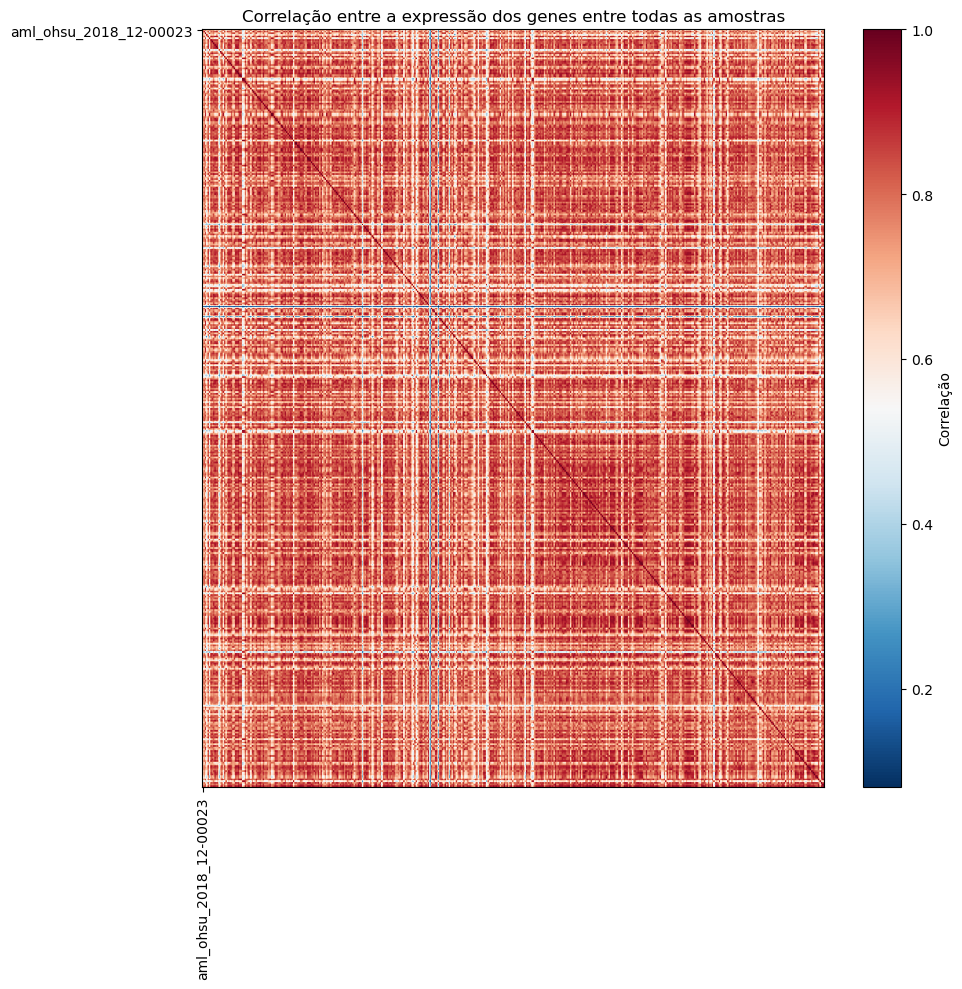

In [22]:
# Heatmap para vermos a correlação entre os valores de expressão dos genes entre todas as amostras
correlation_matrix = rna_data.corr()
plt.figure(figsize=(10, 10))
plt.imshow(correlation_matrix, cmap='RdBu_r', aspect='auto')
plt.colorbar(label = 'Correlação')
plt.title('Correlação entre a expressão dos genes entre todas as amostras')
plt.xticks(range(len(rna_data.columns[:1])), rna_data.columns[:1], rotation=90)
plt.yticks(range(len(rna_data.columns[:1])), rna_data.columns[:1])
plt.tight_layout()
plt.show()


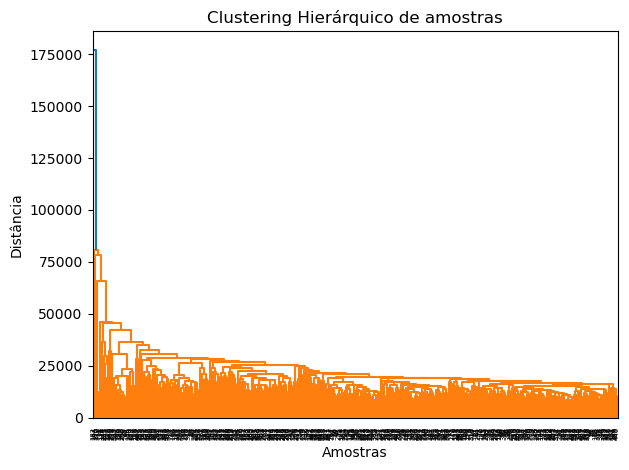

In [187]:
from scipy.cluster.hierarchy import dendrogram, linkage
# Clustering hierárquico das amostras
dendrogram = dendrogram(linkage(RNA_cpm.iloc[:,1:].T, method='average'))
plt.title('Clustering Hierárquico de amostras')
plt.xlabel('Amostras')
plt.ylabel('Distância')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

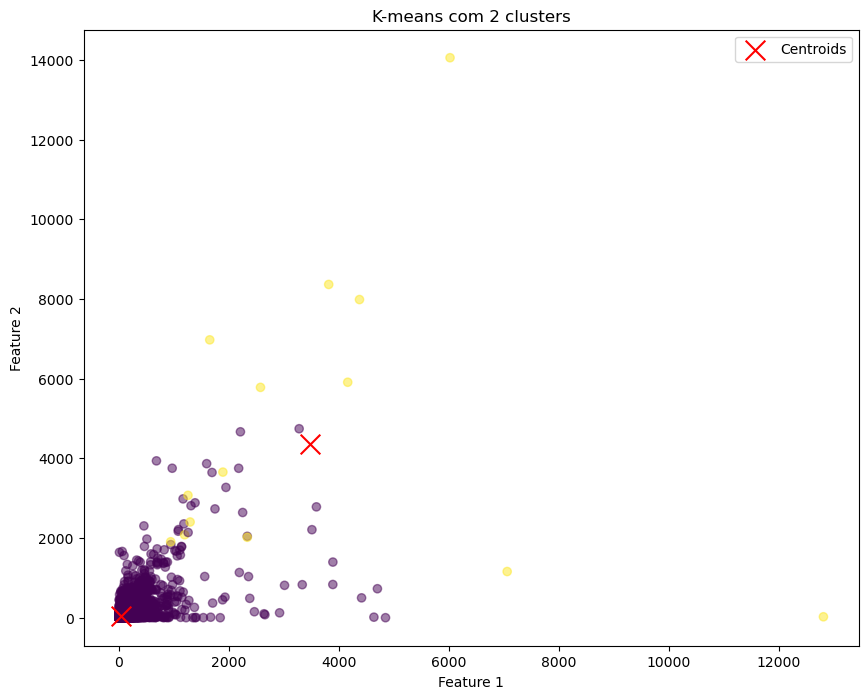

In [190]:
from sklearn.cluster import KMeans
# KMeans clustering
kmeans = KMeans(n_clusters=2, random_state=0)
clusters = kmeans.fit(RNA_cpm)

labels = kmeans.labels_

plt.figure(figsize=(10, 8))
plt.scatter(RNA_cpm.iloc[:, 0], RNA_cpm.iloc[:, 1], c=labels, cmap='viridis', alpha=0.5)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], marker='x', s=200, c='red', label='Centroids')
plt.title('K-means com 2 clusters')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.show()

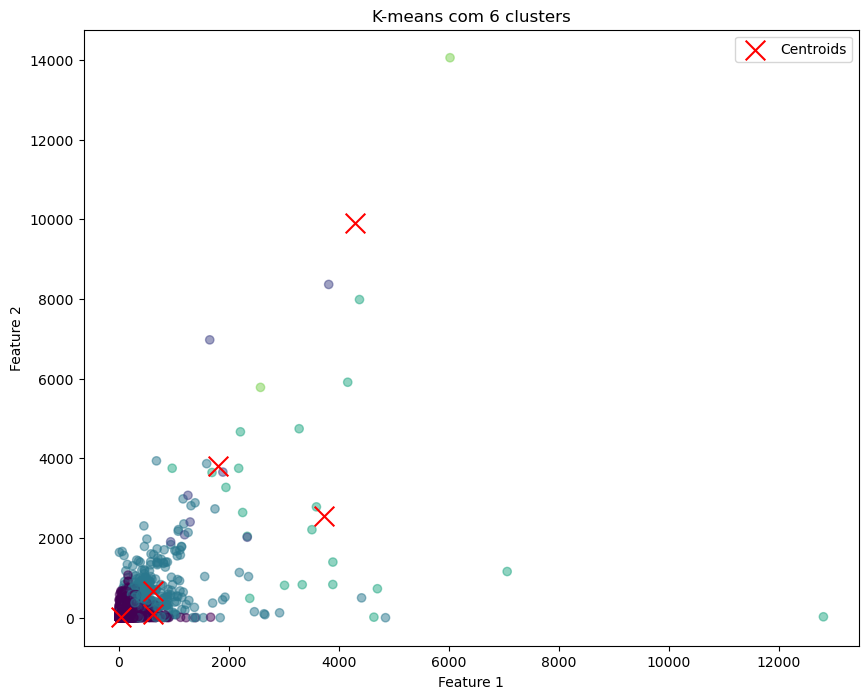

In [191]:
kmeans = KMeans(n_clusters=6, random_state=0)
clusters = kmeans.fit(RNA_cpm)

labels = kmeans.labels_

plt.figure(figsize=(10, 8))
plt.scatter(RNA_cpm.iloc[:, 0], RNA_cpm.iloc[:, 1], c=labels, cmap='viridis', alpha=0.5)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], marker='x', s=200, c='red', label='Centroids')
plt.title('K-means com 6 clusters')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.show()

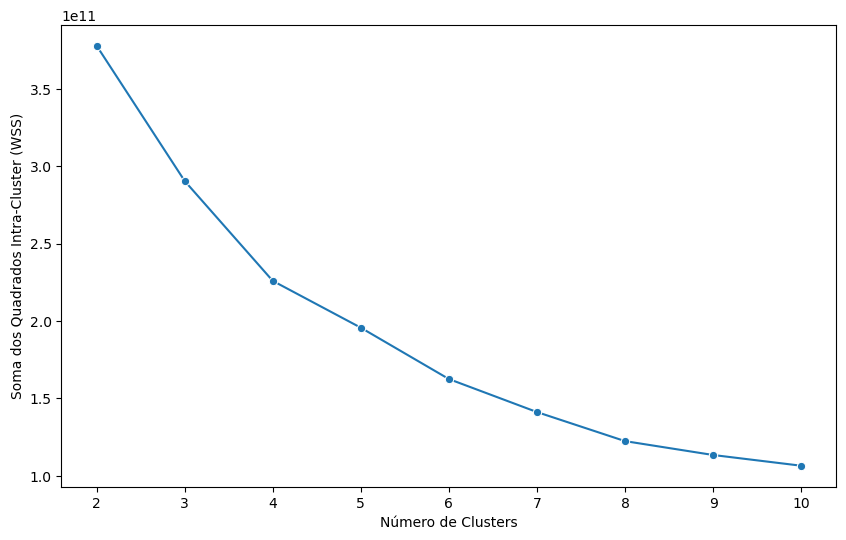

In [194]:
# Método do cotovelo
np.random.seed(123)
inercia = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, n_init=10, random_state=123)
    kmeans.fit(RNA_cpm)
    inercia.append(kmeans.inertia_)
    
plot_data = pd.DataFrame({'clusters': range(2, 11), 'wss': inercia})
plt.figure(figsize=(10, 6))
sns.lineplot(x='clusters', y='wss', data=plot_data, marker='o')
plt.xlabel('Número de Clusters')
plt.ylabel('Soma dos Quadrados Intra-Cluster (WSS)')
plt.show()

Nenhum método de clustering revelou padrões ou agrupamento dos dados de expressão ou amostras.

## Redução da dimensionalidade

A análise não supervisionada será aplicada nos dados de expressão genética filtrados para os genes que apenas tenham pelo menos metade dos pacientes com CPM superior a 1 fossem analisados, e normalizado (`logCPM`).

In [195]:
logCPM = np.log(RNA_cpm + 1)

In [196]:
## Primeiro é necessário transpor o dataframe
DADOS = logCPM.transpose()
DADOS

,TSPAN6,DPM1,SCYL3,C1orf112,FGR,CFH,FUCA2,GCLC,NFYA,STPG1,...,RP11-218F10.3,RP11-686O6.2,RP11-313P22.1,RP11-548H3.1,RP11-102N12.3,RP11-196O16.1,RP4-671G15.2,RP11-731C17.2,RP4-621B10.8,RP11-114I8.4
aml_ohsu_2018_12-00023,0.199407,3.427240,3.012438,2.062881,6.687598,1.748257,4.158077,3.686239,4.194918,1.678664,...,0.365585,0.508042,0.129205,1.027120,0.384542,0.199407,0.027211,0.743551,0.153158,0.153158
aml_ohsu_2018_12-00051,0.978197,3.413229,2.982392,1.285686,2.905085,0.903472,3.476366,3.657316,3.020472,0.836630,...,0.061878,0.000000,0.000000,1.425450,0.061878,0.148060,0.031418,0.227400,0.000000,0.512971
aml_ohsu_2018_12-00066,0.067860,3.190946,2.445149,2.495607,6.811016,1.747375,3.803309,3.814208,4.067931,1.644380,...,0.399786,0.131406,0.191154,0.920133,0.191154,0.274572,0.100137,0.832465,0.034505,0.445788
aml_ohsu_2018_12-00150,0.996749,3.500676,2.932706,2.505848,3.912113,2.225962,4.449565,3.697494,3.498093,2.415894,...,0.133179,0.486616,0.133179,0.837501,0.908876,0.733645,0.000000,0.486616,0.000000,0.157812
aml_ohsu_2018_12-00211,0.000000,3.262604,3.654790,2.605790,4.725926,1.137301,4.095647,4.224638,4.362726,2.171023,...,0.921517,0.264378,0.126190,1.115500,0.065084,0.680624,0.065084,1.287222,0.314715,0.960872
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
aml_ohsu_2018_16-01237,0.222391,3.683498,2.109650,1.765644,4.366301,0.448552,2.689268,3.068677,3.714318,0.620784,...,0.044288,0.867582,0.107247,0.798702,0.044288,0.518349,0.044288,1.243564,0.044288,0.022389
aml_ohsu_2018_16-01254,0.067256,3.285317,3.113378,2.446802,7.154368,0.928427,3.704539,3.535836,4.225558,2.001531,...,0.594233,0.381033,0.000000,1.032758,0.281153,0.365063,0.067256,0.780552,0.442475,0.281153
aml_ohsu_2018_16-01262,0.132833,3.546839,2.859973,2.266733,3.840857,3.286465,3.856371,2.846664,4.230910,2.725179,...,0.725344,0.807821,0.051902,1.163748,0.017602,0.367371,0.117162,1.124153,0.222025,0.290720
aml_ohsu_2018_16-01270,0.140593,2.866479,2.845650,2.072417,3.968382,0.216345,3.787443,3.629195,3.805741,1.075768,...,1.075768,0.805513,0.029745,0.832138,0.000000,1.135713,0.114012,1.201389,0.000000,0.579404


In [ ]:
# Definir uma coluna SAMPLE_ID
DADOS.reset_index(inplace=True)
DADOS.rename(columns={'index': 'SAMPLE_ID'}, inplace=True)
DADOS

,SAMPLE_ID,0,1,2,3,4,5,6,7,8,...,14395,14396,14397,14398,14399,14400,14401,14402,14403,14404
0,aml_ohsu_2018_12.00023,4.944462,4.346029,2.976108,9.648165,2.522201,5.998837,5.318119,6.051988,2.421800,...,0.186404,0.412529,2.107745,0.659267,2.556430,0.471122,1.992462,1.299826,1.481821,1.072717
1,aml_ohsu_2018_12.00051,4.924249,4.302682,1.854853,4.191152,1.303434,5.015335,5.276391,4.357619,1.207002,...,0.399625,1.478880,2.451094,2.908997,4.364342,1.735479,2.056490,3.015329,2.056490,0.328069
2,aml_ohsu_2018_12.00066,4.603562,3.527604,3.600400,9.826219,2.520930,5.487015,5.502739,5.868784,2.372339,...,1.498554,1.480516,1.683371,1.286532,2.771432,0.643137,0.908958,1.875062,1.327472,1.200994
3,aml_ohsu_2018_12.00150,5.050407,4.231000,3.615174,5.643986,3.211384,6.419366,5.334356,5.046681,3.485398,...,0.079951,2.762066,2.762066,2.878429,2.326891,0.541867,2.233835,2.615505,1.208258,0.702038
4,aml_ohsu_2018_12.00211,4.706943,5.272747,3.759361,6.818070,1.640779,5.908769,6.094865,6.294083,3.132124,...,0.957160,1.229575,3.412811,3.238747,3.925004,1.122246,1.935254,3.299132,1.609326,1.857068
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
446,aml_ohsu_2018_16.01237,5.314164,3.043582,2.547285,6.299240,0.647124,3.879794,4.427165,5.358629,0.895602,...,0.626114,2.187373,1.794083,4.235857,3.280522,2.330625,1.706718,0.913054,1.152284,1.794083
447,aml_ohsu_2018_16.01254,4.739710,4.491655,3.529989,10.321571,1.339436,5.344520,5.101133,6.096191,2.887598,...,0.800805,3.210320,2.311924,2.371324,2.318646,0.680715,1.536829,1.740783,1.489955,1.126099
448,aml_ohsu_2018_16.01262,5.117007,4.126069,3.270204,5.541185,4.741367,5.563567,4.106869,6.103913,3.931602,...,2.006746,0.903123,3.031036,2.006746,2.979998,1.357634,1.221445,2.214204,1.678933,1.621810
449,aml_ohsu_2018_16.01270,4.135456,4.105405,2.989866,5.725165,0.312120,5.464126,5.235821,5.490524,1.552005,...,1.772015,1.361740,2.685814,3.793012,4.072127,2.101265,1.552005,3.814842,1.200521,1.733238


In [ ]:
metadados_select = metadados[['ELN_2017', 'ELN_2008', 'SAMPLE_ID']]
merged = pd.merge(DADOS, metadados_select, on='SAMPLE_ID', how='outer')
merged

,SAMPLE_ID,0,1,2,3,4,5,6,7,8,...,14397,14398,14399,14400,14401,14402,14403,14404,ELN_2017,ELN_2008
0,aml_ohsu_2018_12.00023,4.944462,4.346029,2.976108,9.648165,2.522201,5.998837,5.318119,6.051988,2.421800,...,2.107745,0.659267,2.556430,0.471122,1.992462,1.299826,1.481821,1.072717,Intermediate,Intermediate-I
1,aml_ohsu_2018_12.00051,4.924249,4.302682,1.854853,4.191152,1.303434,5.015335,5.276391,4.357619,1.207002,...,2.451094,2.908997,4.364342,1.735479,2.056490,3.015329,2.056490,0.328069,Favorable or Intermediate,Intermediate-I
2,aml_ohsu_2018_12.00066,4.603562,3.527604,3.600400,9.826219,2.520930,5.487015,5.502739,5.868784,2.372339,...,1.683371,1.286532,2.771432,0.643137,0.908958,1.875062,1.327472,1.200994,Intermediate,Intermediate-I
3,aml_ohsu_2018_12.00150,5.050407,4.231000,3.615174,5.643986,3.211384,6.419366,5.334356,5.046681,3.485398,...,2.762066,2.878429,2.326891,0.541867,2.233835,2.615505,1.208258,0.702038,Intermediate,Not Enough Information
4,aml_ohsu_2018_12.00211,4.706943,5.272747,3.759361,6.818070,1.640779,5.908769,6.094865,6.294083,3.132124,...,3.412811,3.238747,3.925004,1.122246,1.935254,3.299132,1.609326,1.857068,Favorable,Intermediate-II
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
446,aml_ohsu_2018_16.01237,5.314164,3.043582,2.547285,6.299240,0.647124,3.879794,4.427165,5.358629,0.895602,...,1.794083,4.235857,3.280522,2.330625,1.706718,0.913054,1.152284,1.794083,Adverse,Adverse
447,aml_ohsu_2018_16.01254,4.739710,4.491655,3.529989,10.321571,1.339436,5.344520,5.101133,6.096191,2.887598,...,2.311924,2.371324,2.318646,0.680715,1.536829,1.740783,1.489955,1.126099,Favorable,Favorable
448,aml_ohsu_2018_16.01262,5.117007,4.126069,3.270204,5.541185,4.741367,5.563567,4.106869,6.103913,3.931602,...,3.031036,2.006746,2.979998,1.357634,1.221445,2.214204,1.678933,1.621810,Favorable,Intermediate-II
449,aml_ohsu_2018_16.01270,4.135456,4.105405,2.989866,5.725165,0.312120,5.464126,5.235821,5.490524,1.552005,...,2.685814,3.793012,4.072127,2.101265,1.552005,3.814842,1.200521,1.733238,Intermediate,Favorable


In [ ]:
# Determinação do PCA
from sklearn.decomposition import PCA

## Formulação do PCA
dados_pca = merged.iloc[:, 1:-2]
# Criar uma instância do PCA
pca = PCA(whiten=False)

# Aplicar o PCA aos dados
pca_result = pca.fit_transform(dados_pca)

pca_result

array([[ 2.89023503e+01, -6.25168584e+01,  2.09745650e+01, ...,
        -6.08017090e-02, -1.95083694e-01,  5.17063328e-14],
       [-2.45981967e+01,  7.91251393e+01, -1.41547857e+01, ...,
         6.45734334e-02, -6.79863360e-02,  5.17063328e-14],
       [ 4.97112409e+01, -4.18012475e+01, -2.44183096e+01, ...,
        -2.72831522e-02, -2.52562202e-01,  5.17063328e-14],
       ...,
       [-2.49893953e+01, -3.08794215e+01, -4.23092127e+01, ...,
        -1.37517369e-01,  4.99574681e-02,  5.17063328e-14],
       [-3.77030622e+01,  3.10550407e+01,  5.69281771e+00, ...,
        -1.75348569e-02, -6.98226854e-02,  5.17063328e-14],
       [ 5.96808309e+01, -1.70991978e+01, -1.92496456e+01, ...,
        -6.29318582e-02,  6.73735785e-02,  5.17063328e-14]])

In [ ]:
## Determinar quantos PCs são necessários para explicar 90% da variâcia dos dados
prop_var = pca.explained_variance_ratio_  
cumulative_prop_var = prop_var.cumsum()  
n_components_90 = (cumulative_prop_var >= 0.9).argmax() + 1
print(n_components_90)

132


A análise dos dados a partir de PCA permitiu concluir que os primeiros 132 componentes principais explicam 90% da variabilidade dos dados, como esse número é consideravelmente inferior ao número inicial de genes (14405), é possível fazer uma redução da dimensão sem perder muita informação. Posteriormente, essa informação pode ser usada para seleccionar os genes que mais contribuem para a variabilidade dos dados de expressão e identificar os processos biológicos significativos.

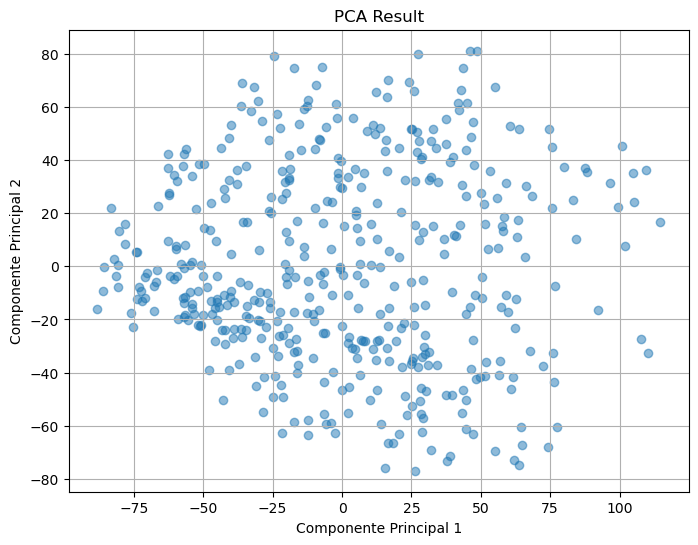

In [ ]:
## Visualizar a distribuição dos dados nos 2 primeiros PCs
import matplotlib.pyplot as plt

# Extrair os dois primeiros componentes principais
pca1 = pca_result[:, 0]
pca2 = pca_result[:, 1]

# Plotar os resultados do PCA
plt.figure(figsize=(8, 6))
plt.scatter(pca1, pca2, alpha=0.5)
plt.title('PCA Result')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.grid(True)
plt.show()

**ELN_2008**

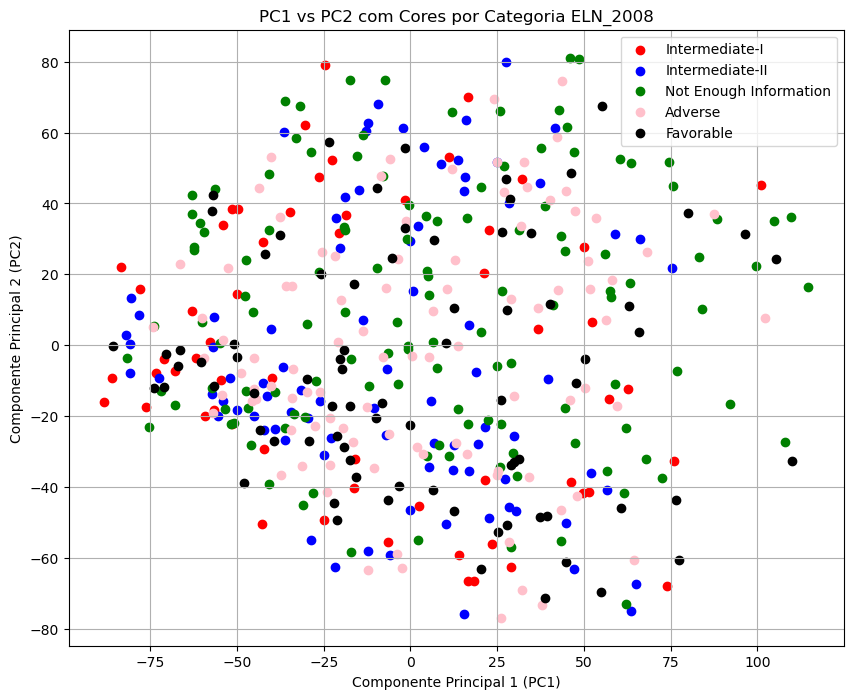

In [ ]:
import matplotlib.pyplot as plt

# Definir cores para cada categoria
cores = {'Intermediate-I': 'red', 'Intermediate-II': 'blue', 'Not Enough Information': 'green', 'Adverse':'pink', 'Favorable': 'black'}  

# Plotar PC1 e PC2 com as cores definidas pelas categorias
plt.figure(figsize=(10, 8))
for categoria, cor in cores.items():
    indices = (merged['ELN_2008'] == categoria)  
    plt.scatter(pca_result[indices, 0], pca_result[indices, 1], c=cor, label=categoria)

plt.title('PC1 vs PC2 com Cores por Categoria ELN_2008')
plt.xlabel('Componente Principal 1 (PC1)')
plt.ylabel('Componente Principal 2 (PC2)')
plt.legend()
plt.grid(True)
plt.show()

**ELN_2017**

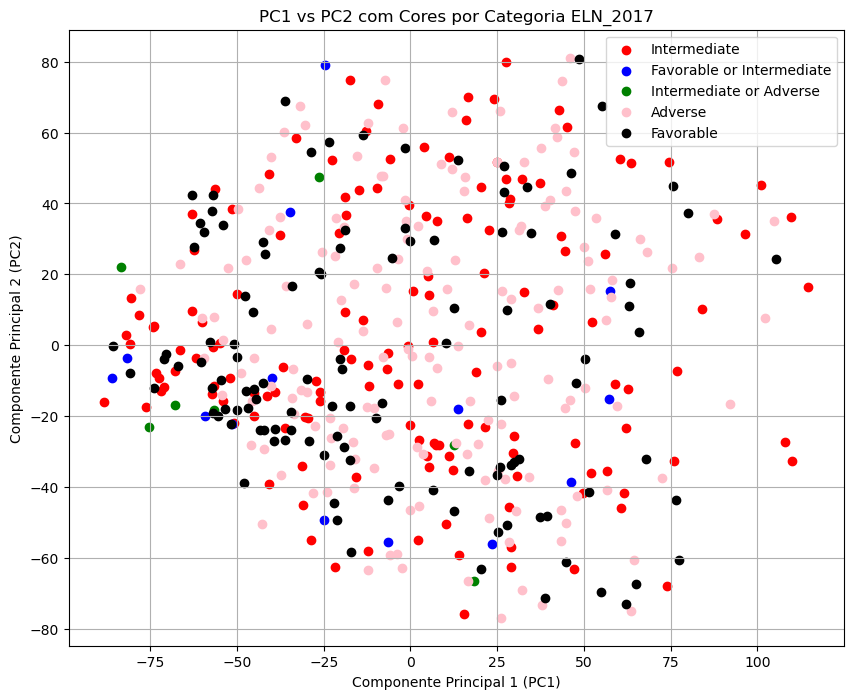

In [ ]:
# Definir cores para cada categoria
cores = {'Intermediate': 'red', 'Favorable or Intermediate': 'blue', 'Intermediate or Adverse': 'green', 'Adverse':'pink', 'Favorable': 'black'} 

# Plotar PC1 e PC2 com as cores definidas pelas categorias
plt.figure(figsize=(10, 8))
for categoria, cor in cores.items():
    indices = (merged['ELN_2017'] == categoria)  
    plt.scatter(pca_result[indices, 0], pca_result[indices, 1], c=cor, label=categoria)

plt.title('PC1 vs PC2 com Cores por Categoria ELN_2017')
plt.xlabel('Componente Principal 1 (PC1)')
plt.ylabel('Componente Principal 2 (PC2)')
plt.legend()
plt.grid(True)
plt.show()

A observação dos diferentes PCAs foi determinada para diferentes categorias dos metadados, de forma a tentar visualizar se há separação entre os diferentes fatores. É possível concluir que não há agrupamento notável ente os diferentes grupos das variáveis analisada: `ELN_2008` e `ELN_2017`. 

É importante ressaltar que esta observação foi realizada apenas até o terceiro Componente Principal, o qual explica conjuntamente cerca de 34,5% da variação nos dados. Portanto, é possível que a variação entre diferentes grupos de amostras não esteja completamente representada nesses primeiros componentes. Futuras análises podem explorar componentes adicionais para uma compreensão mais completa da estrutura dos dados e a identificação de possíveis padrões de agrupamento.

# Machine Learning

## Preparação do Modelo

Para a aplicação de modelos de machine learning, iremos utilizar o dataset "merged". Para isso,realizou-se a modificação do nome de algumas das variáveis, de forma a facilitar a leitura do modelo. Em todos os modelos foi utilizada uma estimação do erro corresponde a validação cruzada com 10 folds repetida 5 vezes, aquando da sua construção. De forma a tornar estes resultados replicáveis, foi invocada uma seed de valor “9999”.

In [ ]:
import numpy as np

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

In [ ]:
ml_data = merged

In [ ]:
ml_data.head()

,SAMPLE_ID,0,1,2,3,4,5,6,7,8,...,14397,14398,14399,14400,14401,14402,14403,14404,ELN_2017,ELN_2008
0,aml_ohsu_2018_12.00023,4.944462,4.346029,2.976108,9.648165,2.522201,5.998837,5.318119,6.051988,2.421800,...,2.107745,0.659267,2.556430,0.471122,1.992462,1.299826,1.481821,1.072717,Intermediate,Intermediate-I
1,aml_ohsu_2018_12.00051,4.924249,4.302682,1.854853,4.191152,1.303434,5.015335,5.276391,4.357619,1.207002,...,2.451094,2.908997,4.364342,1.735479,2.056490,3.015329,2.056490,0.328069,Favorable or Intermediate,Intermediate-I
2,aml_ohsu_2018_12.00066,4.603562,3.527604,3.600400,9.826219,2.520930,5.487015,5.502739,5.868784,2.372339,...,1.683371,1.286532,2.771432,0.643137,0.908958,1.875062,1.327472,1.200994,Intermediate,Intermediate-I
3,aml_ohsu_2018_12.00150,5.050407,4.231000,3.615174,5.643986,3.211384,6.419366,5.334356,5.046681,3.485398,...,2.762066,2.878429,2.326891,0.541867,2.233835,2.615505,1.208258,0.702038,Intermediate,Not Enough Information
4,aml_ohsu_2018_12.00211,4.706943,5.272747,3.759361,6.818070,1.640779,5.908769,6.094865,6.294083,3.132124,...,3.412811,3.238747,3.925004,1.122246,1.935254,3.299132,1.609326,1.857068,Favorable,Intermediate-II


In [ ]:
print(ml_data['ELN_2017'].unique())
print(ml_data['ELN_2008'].unique())

['Intermediate' 'Favorable or Intermediate' 'Favorable' 'Adverse'
 'Intermediate or Adverse' 'Unknown']
['Intermediate-I' 'Not Enough Information' 'Intermediate-II' 'Adverse'
 'Favorable' nan]


In [ ]:
# Definir a seed para caso se queira reproduzir estes resultados
np.random.seed(9999)

# Configurar o controlo de validação cruzada
cv_control = RepeatedStratifiedKFold(n_splits=10, n_repeats=5, random_state=9999)

# No python, não se usa variáveis categóricas para o machine learning

# Remover o Unknown
ml_data = ml_data[ml_data['ELN_2017'] != 'Unknown']

#Transformar os Intermediates num apenas
ml_data['ELN_2008'] = ml_data['ELN_2008'].str.replace('Intermediate-?I+', 'Intermediate', regex=True, case=False)

ml_data['ELN_2017'] = ml_data['ELN_2017'].str.replace('Intermediate or Adverse', 'Intermediate', case=False)
ml_data['ELN_2017'] = ml_data['ELN_2017'].str.replace('Favorable or Intermediate', 'Intermediate', case=False)

# Remover valores omissos e espaços em branco
ml_data['ELN_2017'].replace('', np.nan, inplace=True)
ml_data['ELN_2008'].replace('', np.nan, inplace=True)

ml_data.dropna(subset=['ELN_2017', 'ELN_2008'], inplace=True)


# Fazer verificação outra vez
print(ml_data['ELN_2017'].unique())
print(ml_data['ELN_2008'].unique())

['Intermediate' 'Favorable' 'Adverse']
['Intermediate' 'Not Enough Information' 'Adverse' 'Favorable']


C:\Users\carla\AppData\Local\Temp\ipykernel_22524\1870811181.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ml_data['ELN_2008'] = ml_data['ELN_2008'].str.replace('Intermediate-?I+', 'Intermediate', regex=True, case=False)
C:\Users\carla\AppData\Local\Temp\ipykernel_22524\1870811181.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ml_data['ELN_2017'] = ml_data['ELN_2017'].str.replace('Intermediate or Adverse', 'Intermediate', case=False)
C:\Users\carla\AppData\Local\Temp\ipykernel_22524\1870811181.

Após preparar o dataset, dividiu-se os dados em dois conjuntos:
 - Conjunto de treino (70%)
 - Conjunto de teste (30%)

In [ ]:
# Dividir os dados em conjuntos de treino e teste (70% treino, 30% teste)

# Para o ELN_2017
dados_treino_2017, dados_teste_2017 = train_test_split(ml_data, test_size=0.3, stratify=ml_data['ELN_2017'], random_state=9999)

# Para o ELN_2008
dados_treino_2008, dados_teste_2008 = train_test_split(ml_data, test_size=0.3, stratify=ml_data['ELN_2008'], random_state=9999)

print(f'Treino ELN_2017: {dados_treino_2017.shape}, Teste ELN_2017: {dados_teste_2017.shape}')
print(f'Treino ELN_2008: {dados_treino_2008.shape}, Teste ELN_2008: {dados_teste_2008.shape}')

Treino ELN_2017: (310, 14408), Teste ELN_2017: (134, 14408)
Treino ELN_2008: (310, 14408), Teste ELN_2008: (134, 14408)


In [ ]:
# Passar os valores todos para strings

dados_treino_2017.columns = dados_treino_2017.columns.astype(str)
dados_teste_2017.columns = dados_teste_2017.columns.astype(str)
dados_treino_2008.columns = dados_treino_2008.columns.astype(str)
dados_teste_2008.columns = dados_teste_2008.columns.astype(str)

In [ ]:
# Separar as features (X) e os rótulos (y) para cada conjunto de dados
X_treino_2017 = dados_treino_2017.drop(columns=['ELN_2017'])
y_treino_2017 = dados_treino_2017['ELN_2017']

X_teste_2017 = dados_teste_2017.drop(columns=['ELN_2017'])
y_teste_2017 = dados_teste_2017['ELN_2017']

X_treino_2008 = dados_treino_2008.drop(columns=['ELN_2008'])
y_treino_2008 = dados_treino_2008['ELN_2008']

X_teste_2008 = dados_teste_2008.drop(columns=['ELN_2008'])
y_teste_2008 = dados_teste_2008['ELN_2008']

# Definir o pré-processamento para as variáveis categóricas
# ELN_2017
categorical_features_2017 = X_treino_2017.select_dtypes(include=['category', 'object']).columns
preprocessor_2017 = ColumnTransformer(transformers=[('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features_2017)], remainder='passthrough')
# ELN_2008
categorical_features_2008 = X_treino_2008.select_dtypes(include=['category', 'object']).columns
preprocessor_2008 = ColumnTransformer(transformers=[('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features_2008)], remainder='passthrough')

# Pipeline para treino e transformação da Árvore de Decisão e NB (Optamos por colocar a pipeline dos K Vizinhos no seu capítulo devido ao ciclo) )
pipeline_2017_dt = Pipeline(steps=[('preprocessor', preprocessor_2017), ('classifier', DecisionTreeClassifier(random_state=9999))])
pipeline_2008_dt = Pipeline(steps=[('preprocessor', preprocessor_2008), ('classifier', DecisionTreeClassifier(random_state=9999))])

pipeline_2017_nb = Pipeline(steps=[('preprocessor', preprocessor_2017), ('classifier', GaussianNB())])
pipeline_2008_nb = Pipeline(steps=[('preprocessor', preprocessor_2008), ('classifier', GaussianNB())])



Após a divisão dos dados, foi possível passar à aplicação de diferentes modelos

## Árvore de Decisão

Uma árvore de decisão é um modelo de machine learning utilizado para classificação e regressão. Funciona de forma semelhante a um diagrama de fluxo, onde cada nó interno representa uma "pergunta" sobre uma *feature*, cada ramo representa o resultado dessa pergunta, e cada nó folha representa uma previsão ou classificação final.

Assim, aplicou-se a Árvore de Decisão a duas variáveis em estudo, "ELN_2017" e "ELN_2008".

### ELN_2017

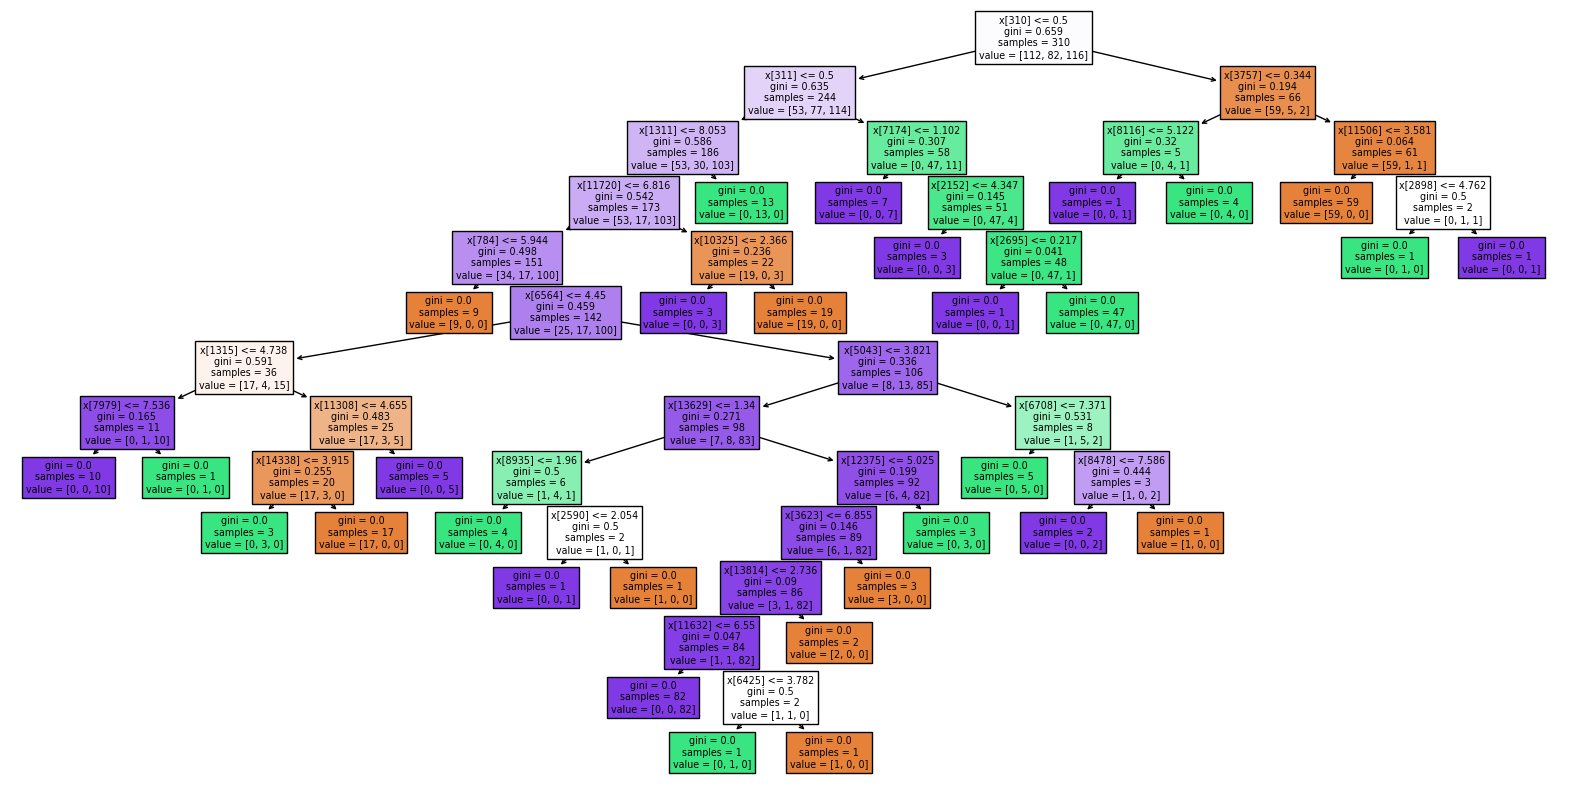

In [ ]:
pipeline_2017_dt.fit(X_treino_2017, y_treino_2017)

plt.figure(figsize=(20,10))
plot_tree(pipeline_2017_dt.named_steps['classifier'], filled=True)
plt.show()

Depois do treino, devemos avaliar a sua performance. Para isso, primeiramente é necessário testar o modelo!


In [ ]:
y_pred_2017 = pipeline_2017_dt.predict(X_teste_2017)


print("Avaliação do Modelo:")
print(classification_report(y_teste_2017, y_pred_2017))

accuracy_2017_dt = accuracy_score(y_teste_2017, y_pred_2017)
print("Accuracy da Árvore de Decisão para ELN_2017:", accuracy_2017_dt)

Avaliação do Modelo:
              precision    recall  f1-score   support

     Adverse       0.61      0.55      0.58        49
   Favorable       0.70      0.74      0.72        35
Intermediate       0.58      0.62      0.60        50

    accuracy                           0.63       134
   macro avg       0.63      0.64      0.63       134
weighted avg       0.63      0.63      0.63       134

Accuracy da Árvore de Decisão para ELN_2017: 0.6268656716417911


É possível observar que com o modelo de Árvores de decisão, para o ELN_2017, obteve-se uma precisão de aproximadamente 63% o que representa uma percentagem de acerto razoável.

### ELN_2008

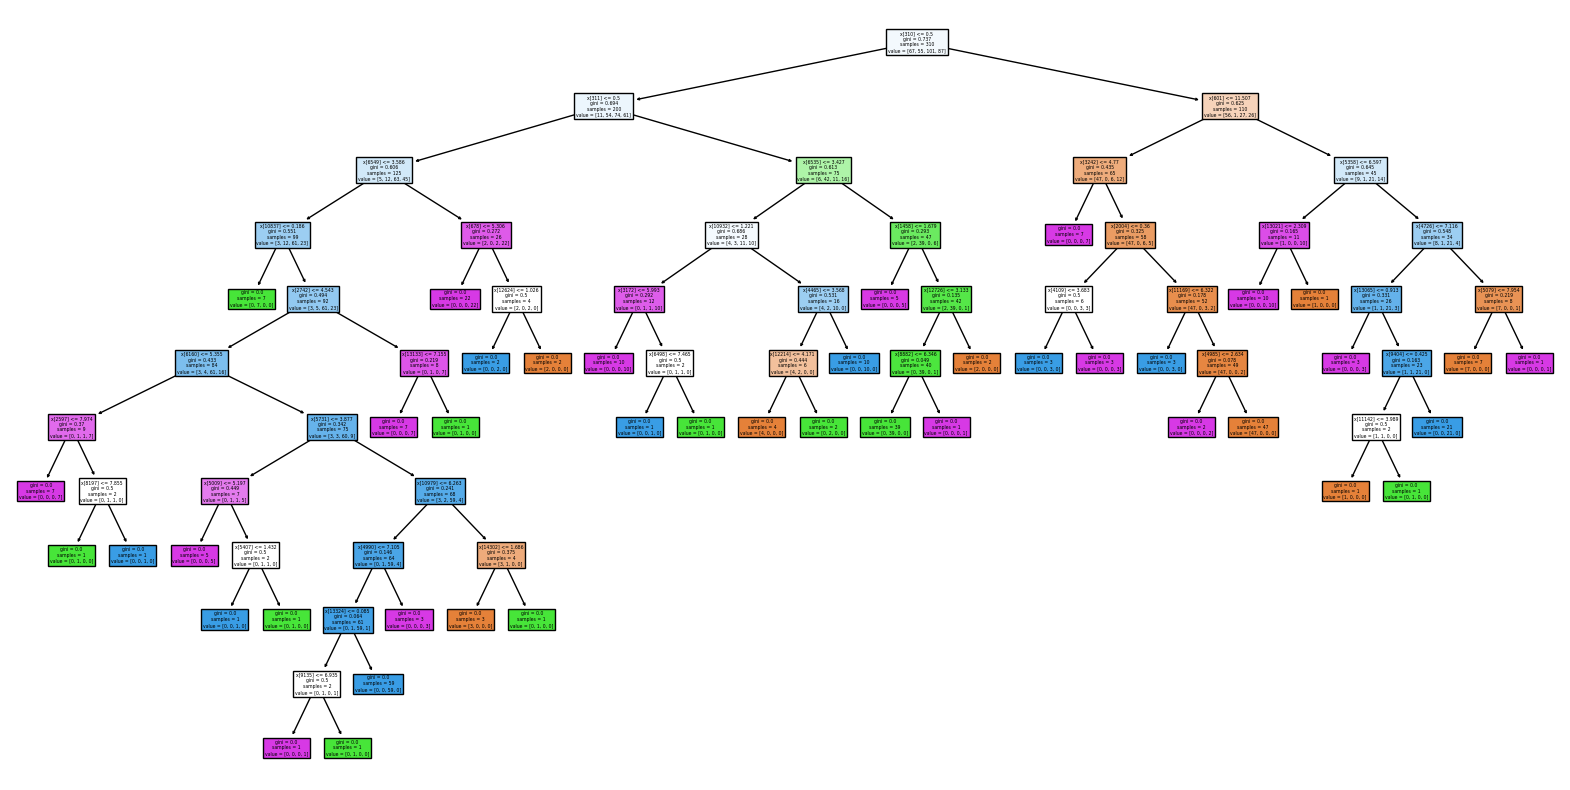

In [ ]:
pipeline_2008_dt.fit(X_treino_2008, y_treino_2008)

plt.figure(figsize=(20,10))
plot_tree(pipeline_2008_dt.named_steps['classifier'], filled=True)
plt.show()

Depois do treino, devemos avaliar a sua performance. Para isso, primeiramente é necessário testar o modelo!


In [ ]:
y_pred_2008 = pipeline_2008_dt.predict(X_teste_2008)


print("Avaliação do Modelo:")
print(classification_report(y_teste_2008, y_pred_2008))


accuracy_2008_dt = accuracy_score(y_teste_2008, y_pred_2008)
print("Accuracy da Árvore de Decisão para ELN_2008:", accuracy_2008_dt)

Avaliação do Modelo:
                        precision    recall  f1-score   support

               Adverse       0.55      0.72      0.63        29
             Favorable       0.54      0.62      0.58        24
          Intermediate       0.51      0.42      0.46        43
Not Enough Information       0.52      0.45      0.48        38

              accuracy                           0.53       134
             macro avg       0.53      0.55      0.54       134
          weighted avg       0.53      0.53      0.52       134

Accuracy da Árvore de Decisão para ELN_2008: 0.5298507462686567


Já relativamente ao ELN_2008, verifica-se que com o modelo de Árvores de decisão obteve-se uma precisão de aproximadamente 53% o que representa uma percentagem de baixa o que pode ser indicativo de algum tipo de problema. Neste caso, talvez existe um mau ajuste de parâmetros ou mau pré-processamento dos dados que possa estar a encaminhar este resultado.

## Naive-Bayes

O algortimo Naive Bayes consiste no Teorema de Bayes, com uma suposição "naive" de independência entre as *features*. Apesar dessa suposição simplista, o algoritmo funciona bem em muitos cenários do mundo real, particularmente em problemas de alta dimensionalidade e texto.

Por estes motivos, decidiu-se aplicar o Naive-Bayes a duas variáveis em estudo, "ELN_2017" e "ELN_2008".

### ELN_2017

In [ ]:
pipeline_2017_nb.fit(X_treino_2017, y_treino_2017)


y_pred_2017_nb = pipeline_2017_nb.predict(X_teste_2017)


print("Avaliação do Modelo:")
print(classification_report(y_teste_2017, y_pred_2017_nb))

accuracy_2017_nb = accuracy_score(y_teste_2017, y_pred_2017_nb)
print("Accuracy do Naive Bayes para ELN_2017:", accuracy_2017_nb)


Avaliação do Modelo:
              precision    recall  f1-score   support

     Adverse       0.68      0.53      0.60        49
   Favorable       0.36      0.69      0.47        35
Intermediate       0.38      0.22      0.28        50

    accuracy                           0.46       134
   macro avg       0.47      0.48      0.45       134
weighted avg       0.49      0.46      0.45       134

Accuracy do Naive Bayes para ELN_2017: 0.4552238805970149


Na tabela obtida, é possível verificar bastantes missmatches entre os valores previstos pelo modelo e os valores reais. Calculando a sua precisão, verificou-se uma precisão de 46%, valor esse bastante mais baixo que o modelo anterior, podendo esse ser mais adequado para este dataset. 

### ELN_2008

In [ ]:
# Treinar o Modelo
pipeline_2008_nb.fit(X_treino_2008, y_treino_2008)


# Testar o Modelo
y_pred_2008_nb = pipeline_2008_nb.predict(X_teste_2008)


print("Avaliação do Modelo:")
print(classification_report(y_teste_2008, y_pred_2008_nb))

accuracy_2008_nb = accuracy_score(y_teste_2008, y_pred_2008_nb)
print("Accuracy do Naive Bayes para ELN_2008:", accuracy_2008_nb)

Avaliação do Modelo:
                        precision    recall  f1-score   support

               Adverse       0.60      0.52      0.56        29
             Favorable       0.40      0.58      0.47        24
          Intermediate       0.46      0.37      0.41        43
Not Enough Information       0.41      0.42      0.42        38

              accuracy                           0.46       134
             macro avg       0.47      0.47      0.46       134
          weighted avg       0.46      0.46      0.45       134

Accuracy do Naive Bayes para ELN_2008: 0.4552238805970149


Na tabela obtida, também é possível verificar bastantes missmatches entre os valores previstos pelo modelo e os valores reais. Calculando a sua precisão, verificou-se uma precisão de aproximadamente 46%, valor também muito baixo, tal como acontece na outra variável em estudo para o mesmo modelo. Além disso, visto que apresenta uma accuracy mais baixa que a Árvore de Decisão, este modelo pode não ser o mais adequado para este dataset. 

## K Vizinhos

O algoritmo K-Nearest Neighbors (KNN) é um método de machine learning usado para problemas de classificação e regressão. Ele é baseado na ideia de que objetos similares estão próximos uns dos outros no espaço das *features*. Assim, classifica uma nova amostra com base nas classes das 𝐾 amostras mais próximas. A distância entre as amostras geralmente é calculada usando a distância Euclidiana.
Assim, decidiu-se aplicar este modelo às duas variáveis em estudo!

### ELN_2017

Para este modelo, antes de fazer as previsões, decidiu-se encontrar o valor ideal de vizinhos (k), de forma a otimizar a accuracy da previsão!

In [ ]:
nr_vizinhos = np.arange(1,20)

accuracy_treino_2017 = {}
accuracy_teste_2017 = {}

for vizinho in nr_vizinhos:
    
    pipeline_2017_kv = Pipeline(steps=[('preprocessor', preprocessor_2017), ('classifier', KNeighborsClassifier(n_neighbors=vizinho))])
    
    pipeline_2017_kv.fit(X_treino_2017, y_treino_2017)
    
    accuracy_treino_2017[vizinho] = pipeline_2017_kv.score(X_treino_2017, y_treino_2017)
    
    accuracy_teste_2017[vizinho] = pipeline_2017_kv.score(X_teste_2017, y_teste_2017)
    
k_ideal_2017 = max(accuracy_teste_2017, key=accuracy_teste_2017.get)
print(f'O valor ideal para k é: {k_ideal_2017}')

O valor ideal para k é: 12


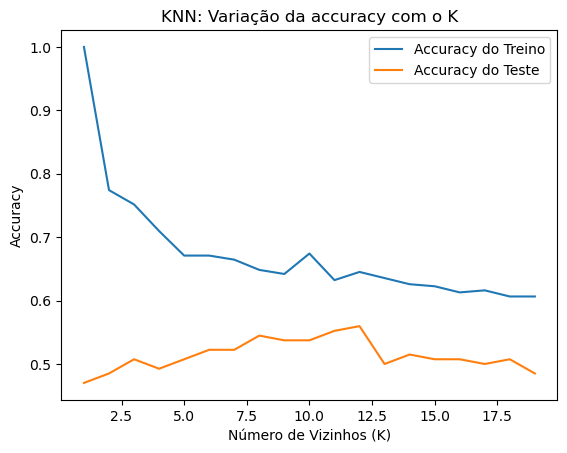

In [ ]:
plt.title("KNN: Variação da accuracy com o K")

plt.plot(nr_vizinhos, accuracy_treino_2017.values(), label = "Accuracy do Treino")

plt.plot(nr_vizinhos, accuracy_teste_2017.values(), label = "Accuracy do Teste")

plt.legend()
plt.xlabel('Número de Vizinhos (K)')
plt.ylabel('Accuracy')

plt.show()

Obtendo o valor ideal para k, neste caso é igual a 12 vizinhos, pode-se utilizar o mesmo nas previsões, otimizando assim a accuracy.

In [ ]:
pipeline_2017_kv = Pipeline(steps=[('preprocessor', preprocessor_2017), ('classifier', KNeighborsClassifier(n_neighbors= k_ideal_2017))])

pipeline_2017_kv.fit(X_treino_2017, y_treino_2017)

y_pred_2017_kv = pipeline_2017_kv.predict(X_teste_2017)


print("Avaliação do Modelo:")
print(classification_report(y_teste_2017, y_pred_2017_kv))

accuracy_2017_kv = accuracy_score(y_teste_2017, y_pred_2017_kv)
print("Accuracy do K Vizinhos para ELN_2017:", accuracy_2017_kv)

Avaliação do Modelo:
              precision    recall  f1-score   support

     Adverse       0.58      0.51      0.54        49
   Favorable       0.60      0.80      0.68        35
Intermediate       0.50      0.44      0.47        50

    accuracy                           0.56       134
   macro avg       0.56      0.58      0.56       134
weighted avg       0.55      0.56      0.55       134

Accuracy do K Vizinhos para ELN_2017: 0.5597014925373134


Este modelo, para o ELN_2017, apresenta uma accuracy de aproximadamente 56%. Esse valor é superior ao valor obtido pelo Naive-Bayes mas inferior quando comparado com as Árvores de decisão.

### ELN_2008

Repetindo o procedimento e a lógica, mas para a variável ELN_2008

In [ ]:
nr_vizinhos = np.arange(1,20)

accuracy_treino_2008 = {}
accuracy_teste_2008 = {}

for vizinho in nr_vizinhos:
    
    pipeline_2008_kv = Pipeline(steps=[('preprocessor', preprocessor_2008), ('classifier', KNeighborsClassifier(n_neighbors=vizinho))])
    
    pipeline_2008_kv.fit(X_treino_2008, y_treino_2008)
    
    accuracy_treino_2008[vizinho] = pipeline_2008_kv.score(X_treino_2008, y_treino_2008)
    
    accuracy_teste_2008[vizinho] = pipeline_2008_kv.score(X_teste_2008, y_teste_2008)
    
k_ideal_2008 = max(accuracy_teste_2008, key=accuracy_teste_2008.get)
print(f'O valor ideal para k é: {k_ideal_2008}')

O valor ideal para k é: 14


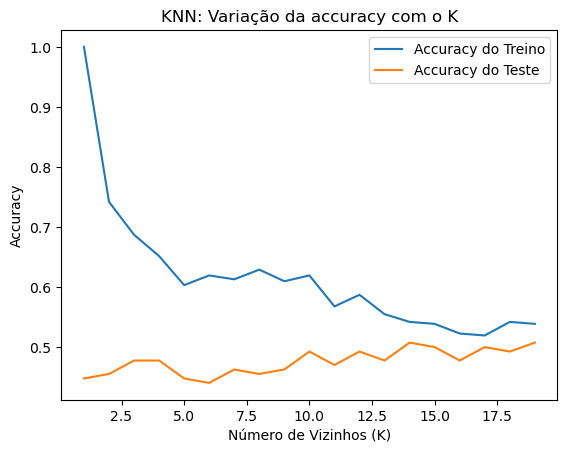

In [ ]:
plt.title("KNN: Variação da accuracy com o K")

plt.plot(nr_vizinhos, accuracy_treino_2008.values(), label = "Accuracy do Treino")

plt.plot(nr_vizinhos, accuracy_teste_2008.values(), label = "Accuracy do Teste")

plt.legend()
plt.xlabel('Número de Vizinhos (K)')
plt.ylabel('Accuracy')

plt.show()

In [ ]:
pipeline_2008_kv = Pipeline(steps=[('preprocessor', preprocessor_2008), ('classifier', KNeighborsClassifier(n_neighbors= k_ideal_2008))])

pipeline_2008_kv.fit(X_treino_2008, y_treino_2008)

y_pred_2008_kv = pipeline_2008_kv.predict(X_teste_2008)


print("Avaliação do Modelo:")
print(classification_report(y_teste_2008, y_pred_2008_kv))

accuracy_2008_kv = accuracy_score(y_teste_2008, y_pred_2008_kv)
print("Accuracy do K Vizinhos para ELN_2008:", accuracy_2008_kv)

Avaliação do Modelo:
                        precision    recall  f1-score   support

               Adverse       0.77      0.34      0.48        29
             Favorable       0.50      0.58      0.54        24
          Intermediate       0.42      0.72      0.53        43
Not Enough Information       0.65      0.34      0.45        38

              accuracy                           0.51       134
             macro avg       0.59      0.50      0.50       134
          weighted avg       0.58      0.51      0.50       134

Accuracy do K Vizinhos para ELN_2008: 0.5074626865671642


Este modelo, para o ELN_2008, apresenta uma accuracy de aproximadamente 51%. Esse valor é superior ao valor obtido pelo Naive-Bayes mas ligeiramente inferior quando comparado com as Árvores de decisão.

# Conclusão

Os resultados deste trabalho destacam a importância de algumas variáveis na sensibilidade e resistência de grupos de pacientes com LMA. O sexo, por exemplo, foi uma dessas variáveis onde se percebeu a existência de genes diferencialmente expressos como o "XIST", envolvido na inativação do cromossoma X.  Para a variável ELN_2017, também foram identificados genes diferencialmente expressos que estão envolvidos em processos críticos para a progressão tumoral, como a proliferação celular, síntese proteica e regulação génica.

Apesar das tentativas de agrupar os dados de expressão usando métodos de clustering, não foram encontrados padrões ou agrupamentos significativos. No entanto, a análise de PCA revelou que os primeiros 132 componentes principais explicam 90% da variabilidade dos dados, ou seja, é possível reduzir a dimensão dos dados sem perder muita informação. Isso permite selecionar os genes que mais contribuem para a variabilidade dos dados de expressão e identificar processos biológicos importantes. Além disso, a observação dos diferentes PCAs para diversas categorias de metadados mostrou que não há separação clara entre os grupos analisados, especificamente para as variáveis ELN_2008 e ELN_2017.

Já na análise supervisionada, foram testados três modelos (Naive Bayes, KNN e Árvore de Decisão) para prever as variáveis ELN_2017 e ELN_2008. Embora a Árvore de Decisão tenha apresentado os melhores resultados, no geral, os modelos não tiveram desempenho satisfatório. Isso provavelmente deve-se a um processamento inadequado dos dados e ao sobreajuste (overfitting), ressaltando a importância de uma seleção criteriosa das características para construir modelos de machine learning de alta qualidade.